### Importing Required Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as stt
import pickle
from sklearn.preprocessing import PowerTransformer
from scipy.stats import yeojohnson
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error

## Data Filtering

### Loading the Dataset

In [2]:
df=pd.read_csv("weatherAUS.csv")
print(df)
print('-' * 30)
df.head()

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

### Exploratory Data Analysis

##### Starting EDA

In [3]:
df.shape,df.columns

((145460, 23),
 Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
        'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
        'Temp3pm', 'RainToday', 'RainTomorrow'],
       dtype='object'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [6]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
for i in df.columns:
    print(df[i].unique())

['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4

##### Trying to find missing values

In [9]:
print("Using notnull():")
print(df.notnull())

Using notnull():
        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       True      True     True     True      True        False     False   
1       True      True     True     True      True        False     False   
2       True      True     True     True      True        False     False   
3       True      True     True     True      True        False     False   
4       True      True     True     True      True        False     False   
...      ...       ...      ...      ...       ...          ...       ...   
145455  True      True     True     True      True        False     False   
145456  True      True     True     True      True        False     False   
145457  True      True     True     True      True        False     False   
145458  True      True     True     True      True        False     False   
145459  True      True     True    False      True        False     False   

        WindGustDir  WindGustSpeed  WindDir9am  ...  Humid

In [10]:
print("Not Null values:\n",df.notnull().sum(),sep='')

Not Null values:
Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64


In [11]:
print("Null values:\n",df.isnull().sum(),sep='')

Null values:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [12]:
print("Null values:\n",df.shape[0]-df.notnull().sum(),sep='')

Null values:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


##### Calculate the percentage of missing values for each column

In [13]:
for i in df.columns:
    print(f"missing value in {i} : {df[i].isnull().sum()}")
    missing_value_percent=((df.shape[0]-df[i].notnull().sum())/df.shape[0])*100
    print("missing value % =", missing_value_percent,"\n")

missing value in Date : 0
missing value % = 0.0 

missing value in Location : 0
missing value % = 0.0 

missing value in MinTemp : 1485
missing value % = 1.0208992162793895 

missing value in MaxTemp : 1261
missing value % = 0.8669049910628353 

missing value in Rainfall : 3261
missing value % = 2.2418534304963567 

missing value in Evaporation : 62790
missing value % = 43.166506256015396 

missing value in Sunshine : 69835
missing value % = 48.00976213391998 

missing value in WindGustDir : 10326
missing value % = 7.098858792795271 

missing value in WindGustSpeed : 10263
missing value % = 7.055547916953114 

missing value in WindDir9am : 10566
missing value % = 7.263852605527293 

missing value in WindDir3pm : 4228
missing value % = 2.906641000962464 

missing value in WindSpeed9am : 1767
missing value % = 1.214766946239516 

missing value in WindSpeed3pm : 3062
missing value % = 2.105046060772721 

missing value in Humidity9am : 2654
missing value % = 1.8245565791282825 

missing va

### removing the Missing Values

In [14]:
for i in df.columns:
    missing_value_percent=((df.shape[0]-df[i].notnull().sum())/df.shape[0])*100
    if missing_value_percent> 45:
        df.drop(columns=i, inplace=True)  #inplace=True is used to drop the columns in the original dataset and not on the copy 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [15]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [16]:
df.drop(columns=["Date","Location"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Cloud9am       89572 non-null   float64
 15  Cloud3pm       86102 non-null   float64
 16  Temp9am        143693 non-null  float64
 17  Temp3pm        141851 non-nul

In [17]:
for column in df.columns:
    try:
        print(f"Mean of the column, {column} is {df[column].mean()}\nMedian of the column is {df[column].median()}\nMode of the column is {stt.multimode(df[column])}\n")

    except:
        print(f"Mode of the column, {column} is {stt.multimode(df[column])}\n")

Mean of the column, MinTemp is 12.19403438096892
Median of the column is 12.0
Mode of the column is [11.0]

Mean of the column, MaxTemp is 23.22134827564685
Median of the column is 22.6
Mode of the column is [20.0]

Mean of the column, Rainfall is 2.3609181499166656
Median of the column is 0.0
Mode of the column is [0.0]

Mean of the column, Evaporation is 5.468231522922462
Median of the column is 4.8
Mode of the column is [4.0]

Mode of the column, WindGustDir is [nan]

Mean of the column, WindGustSpeed is 40.03523007167319
Median of the column is 39.0
Mode of the column is [35.0]

Mode of the column, WindDir9am is ['N']

Mode of the column, WindDir3pm is ['SE']

Mean of the column, WindSpeed9am is 14.043425914971502
Median of the column is 13.0
Mode of the column is [9.0]

Mean of the column, WindSpeed3pm is 18.662656778887342
Median of the column is 19.0
Mode of the column is [13.0]

Mean of the column, Humidity9am is 68.88083133761887
Median of the column is 70.0
Mode of the column

### Handling/Removing the Missing Values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Cloud9am       89572 non-null   float64
 15  Cloud3pm       86102 non-null   float64
 16  Temp9am        143693 non-null  float64
 17  Temp3pm        141851 non-nul

In [19]:
df.dropna(subset=['RainToday','RainTomorrow'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        140319 non-null  float64
 1   MaxTemp        140480 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    81093 non-null   float64
 4   WindGustDir    131624 non-null  object 
 5   WindGustSpeed  131682 non-null  float64
 6   WindDir9am     131127 non-null  object 
 7   WindDir3pm     137117 non-null  object 
 8   WindSpeed9am   139732 non-null  float64
 9   WindSpeed3pm   138256 non-null  float64
 10  Humidity9am    139270 non-null  float64
 11  Humidity3pm    137286 non-null  float64
 12  Pressure9am    127044 non-null  float64
 13  Pressure3pm    127018 non-null  float64
 14  Cloud9am       88162 non-null   float64
 15  Cloud3pm       84693 non-null   float64
 16  Temp9am        140131 non-null  float64
 17  Temp3pm        138163 non-null  fl

In [21]:
for all in df.columns:
    try:
        df[all]=df[all].fillna(df[all].median())
    except:
        nan_val=df[all].dropna()
        df[all]=df[all].fillna(stt.mode(nan_val))
    
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        140787 non-null  float64
 1   MaxTemp        140787 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    140787 non-null  float64
 4   WindGustDir    140787 non-null  object 
 5   WindGustSpeed  140787 non-null  float64
 6   WindDir9am     140787 non-null  object 
 7   WindDir3pm     140787 non-null  object 
 8   WindSpeed9am   140787 non-null  float64
 9   WindSpeed3pm   140787 non-null  float64
 10  Humidity9am    140787 non-null  float64
 11  Humidity3pm    140787 non-null  float64
 12  Pressure9am    140787 non-null  float64
 13  Pressure3pm    140787 non-null  float64
 14  Cloud9am       140787 non-null  float64
 15  Cloud3pm       140787 non-null  float64
 16  Temp9am        140787 non-null  float64
 17  Temp3pm        140787 non-null  fl

### Plotting Graphs

##### Histplot

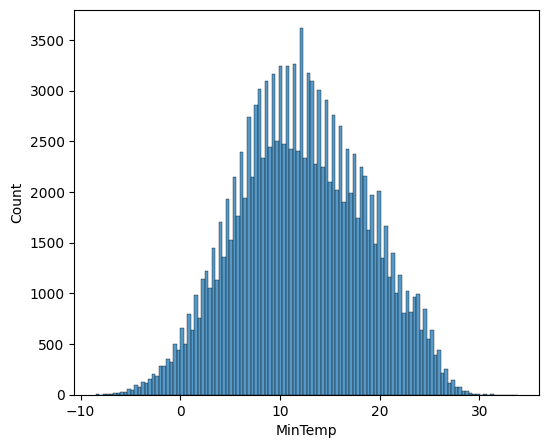

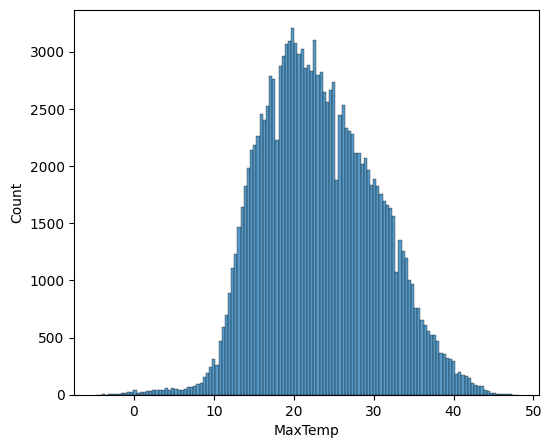

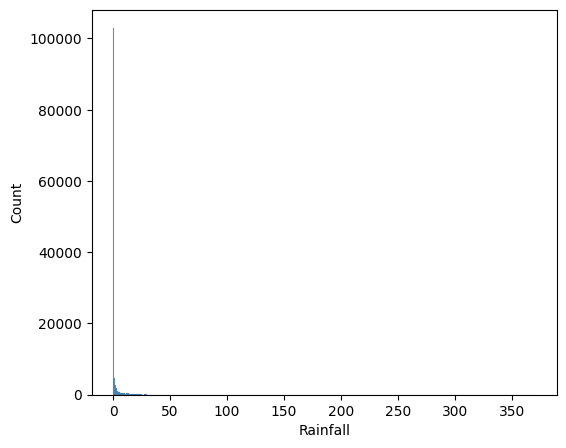

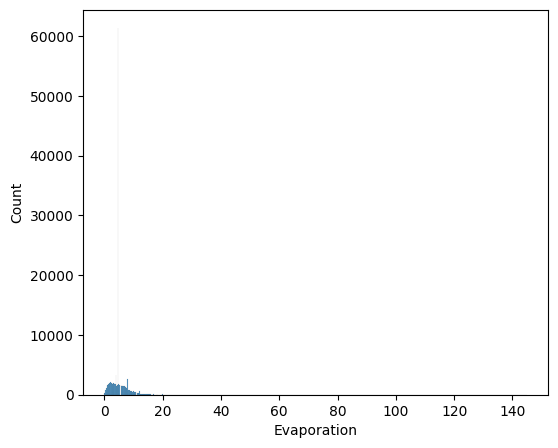

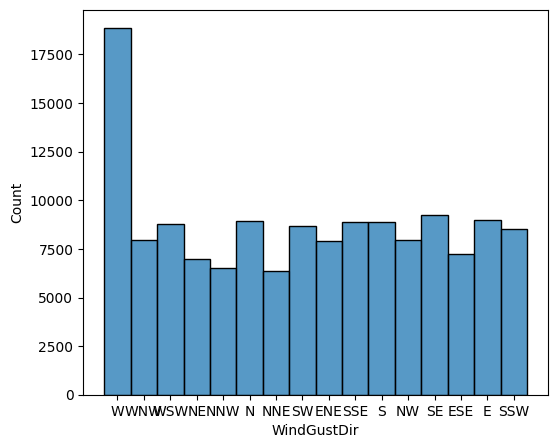

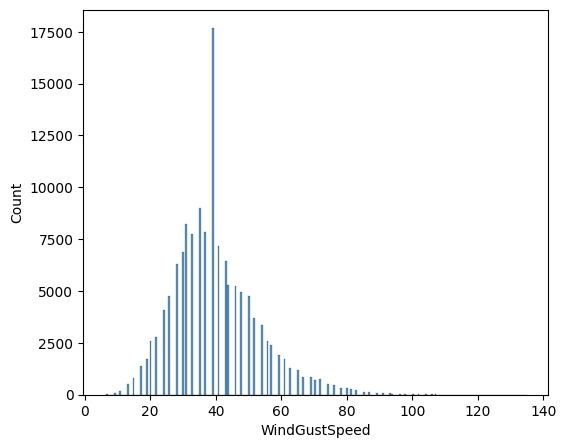

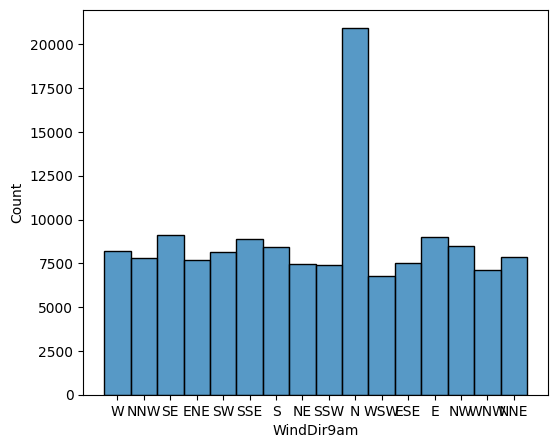

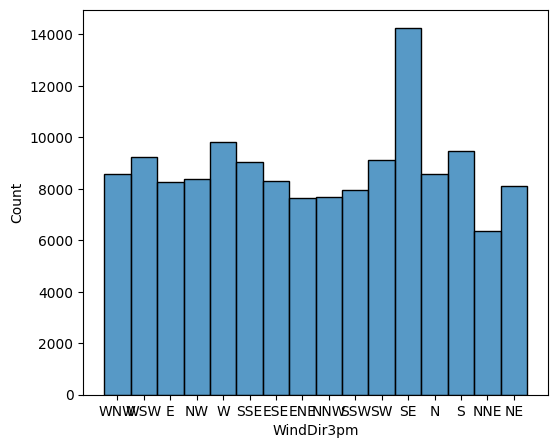

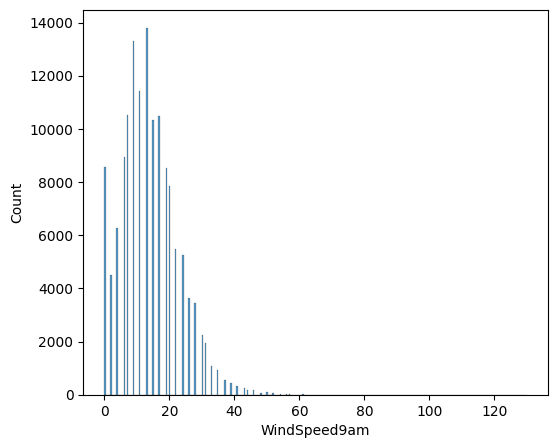

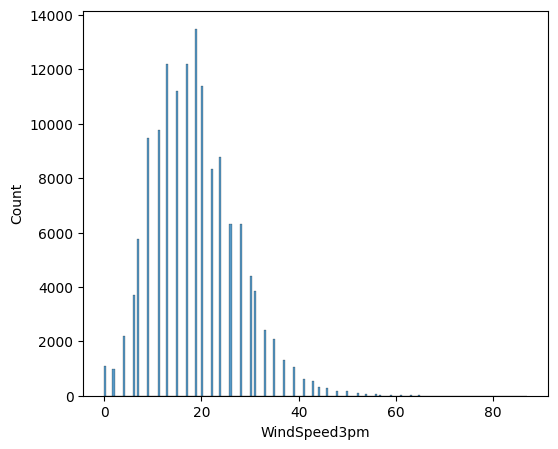

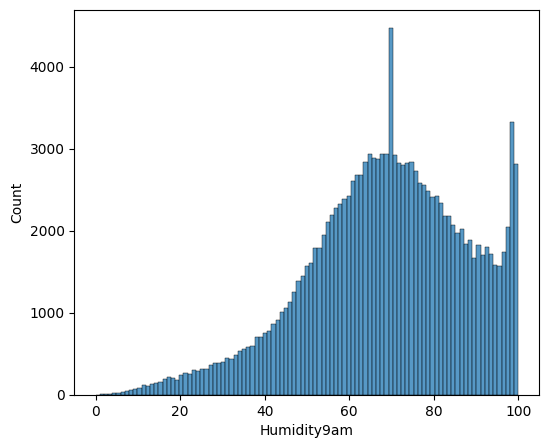

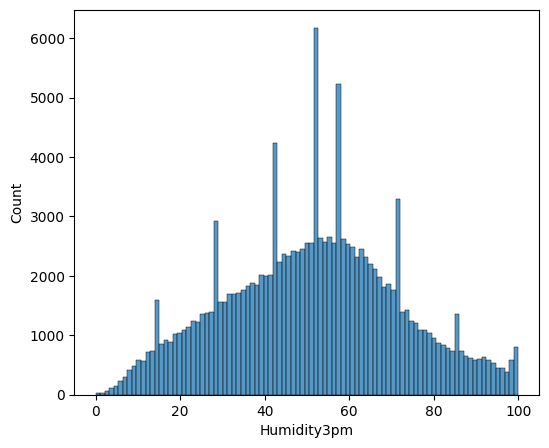

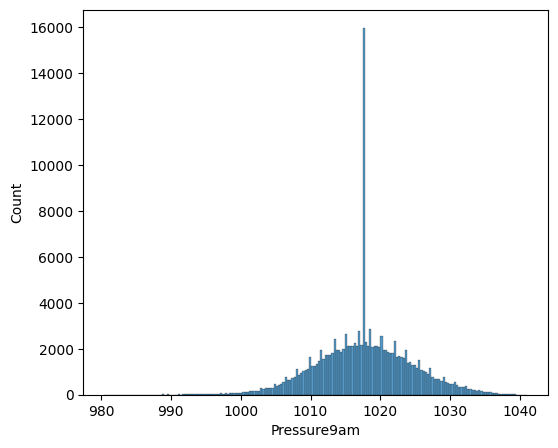

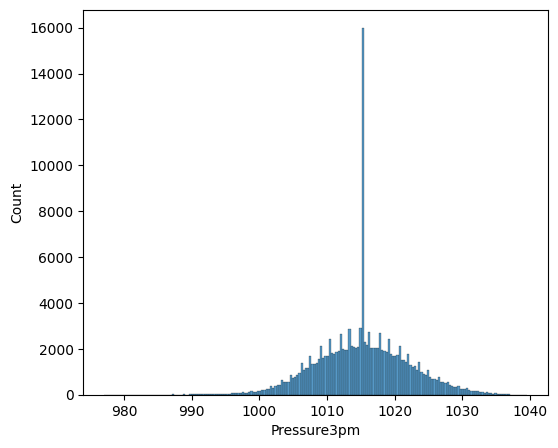

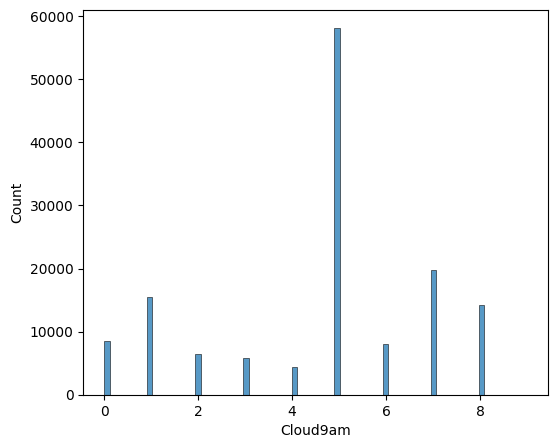

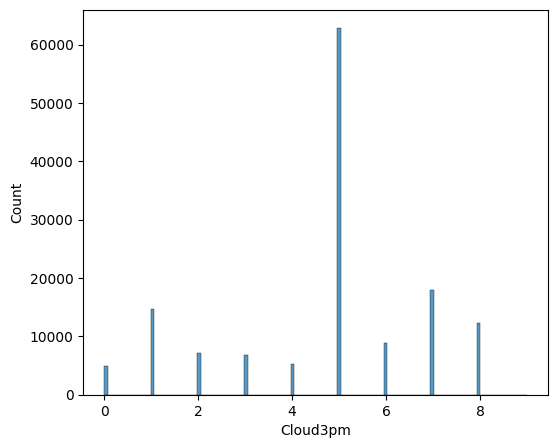

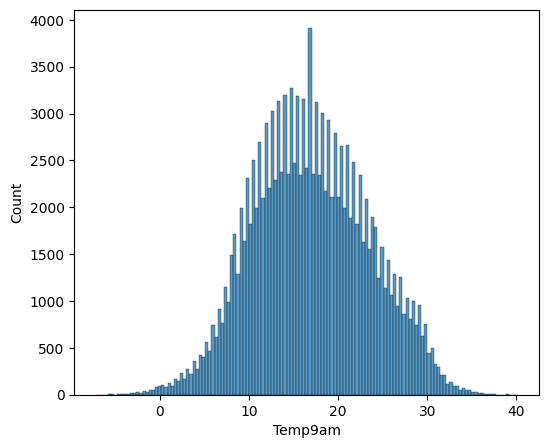

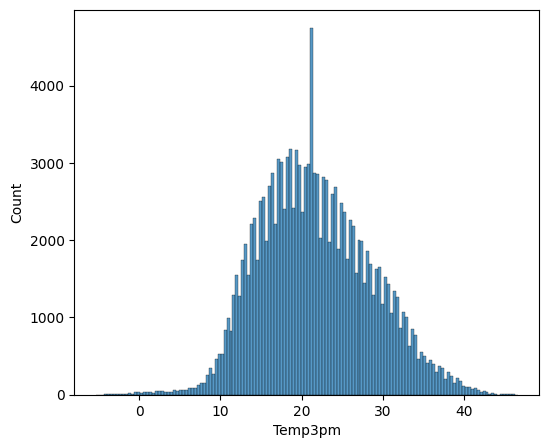

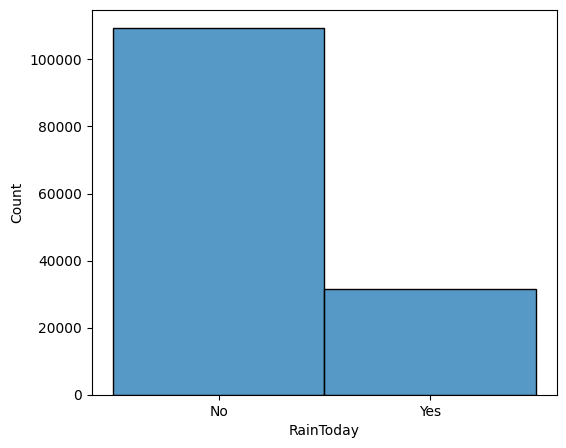

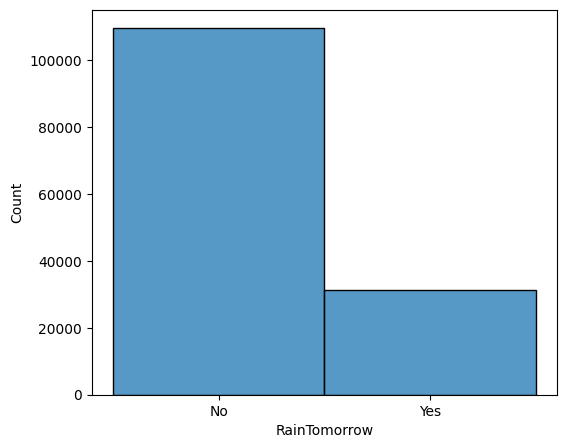

In [23]:
for histo in df.columns:
    plt.figure(figsize=(6,5))
    sb.histplot(df[histo])

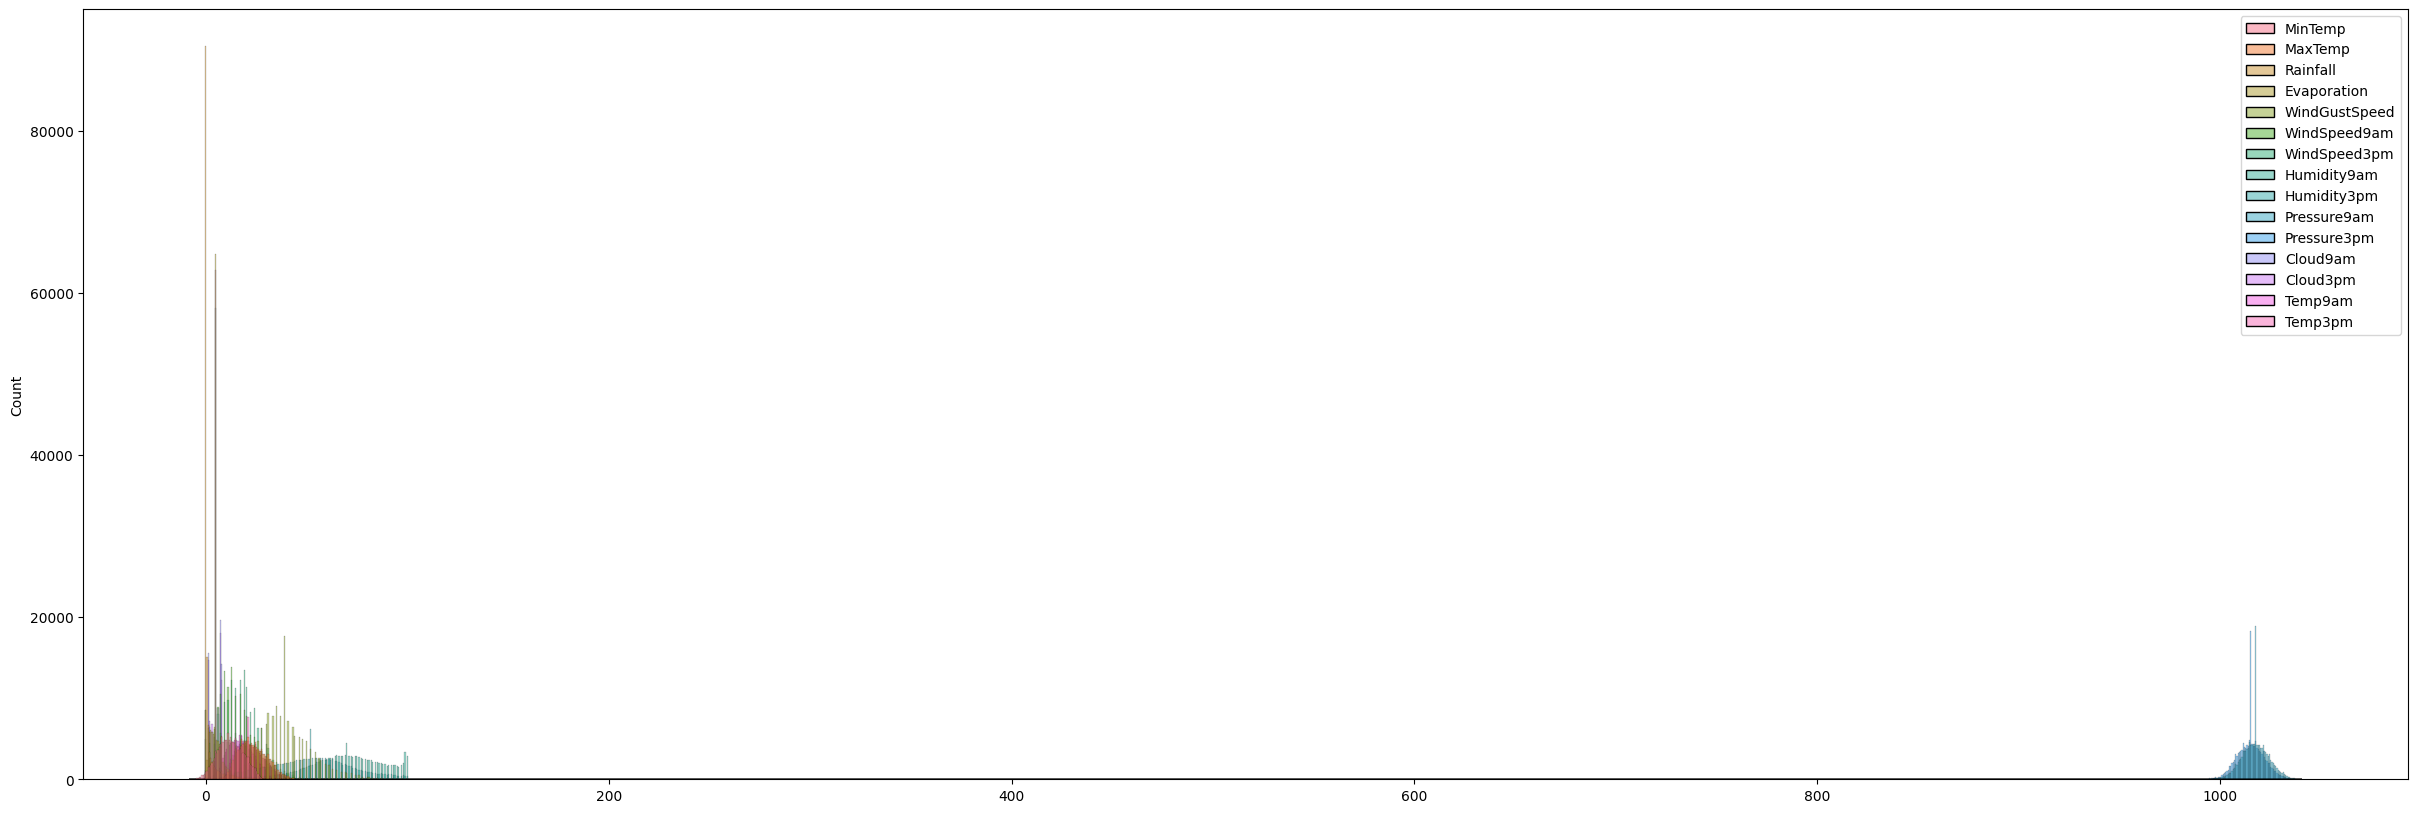

In [24]:
plt.figure(figsize=(30,10))
sb.histplot(df)
plt.show()

##### Barplot

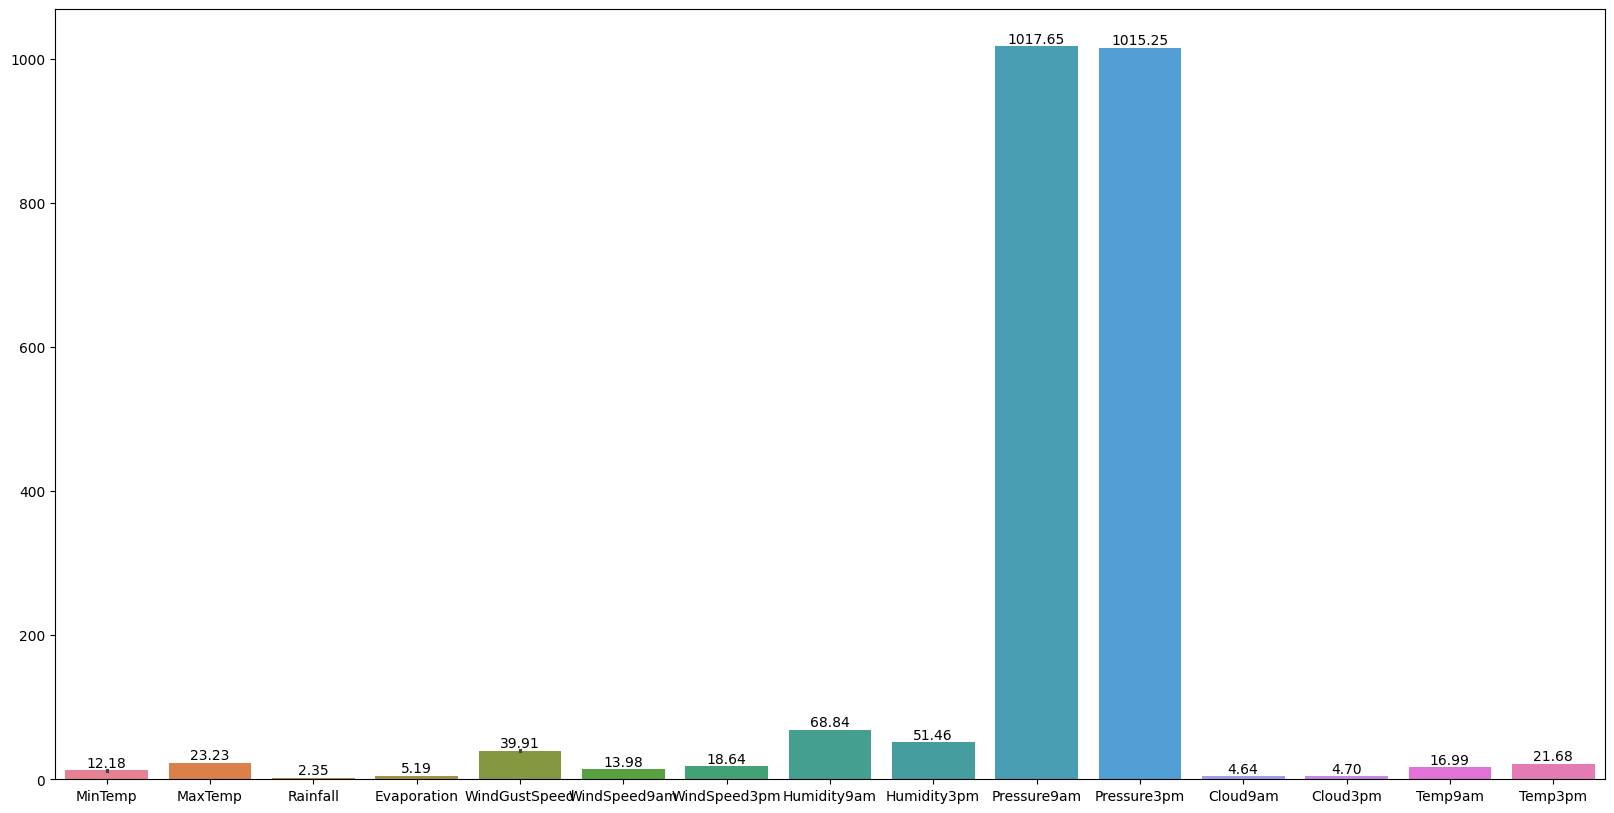

In [25]:
plt.figure(figsize=(20,10))
ax = sb.barplot(data=df)

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')  # Use '%d' for integers

plt.show()

##### Lineplot

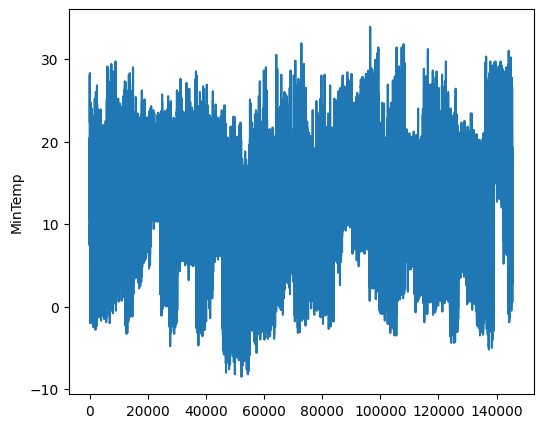

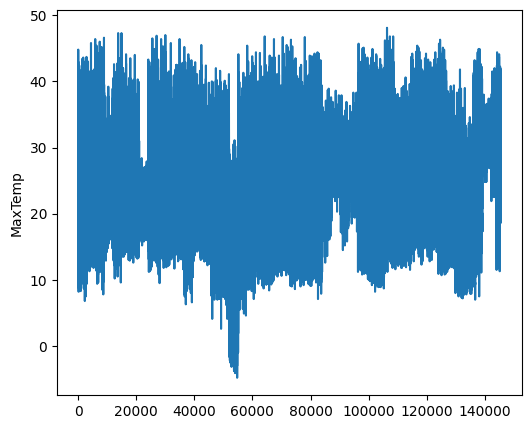

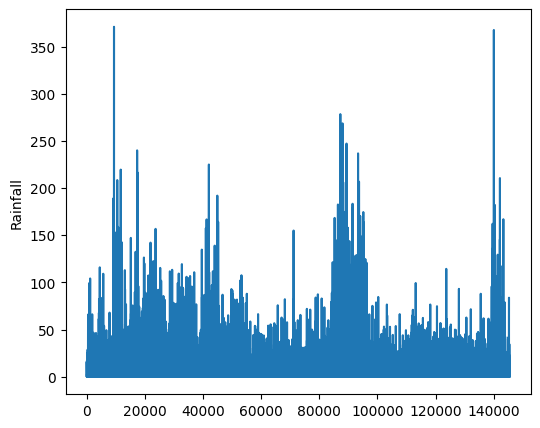

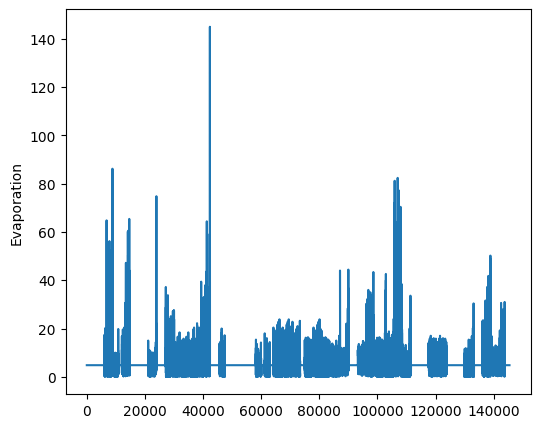

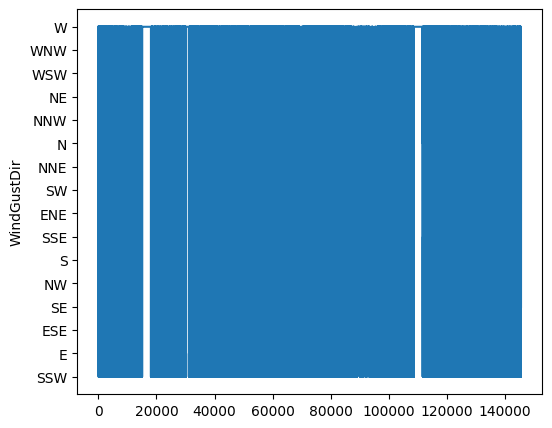

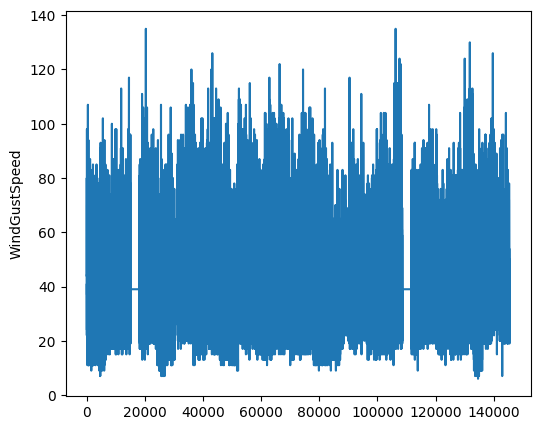

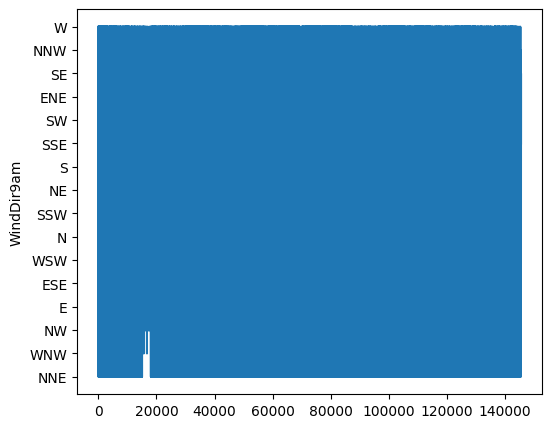

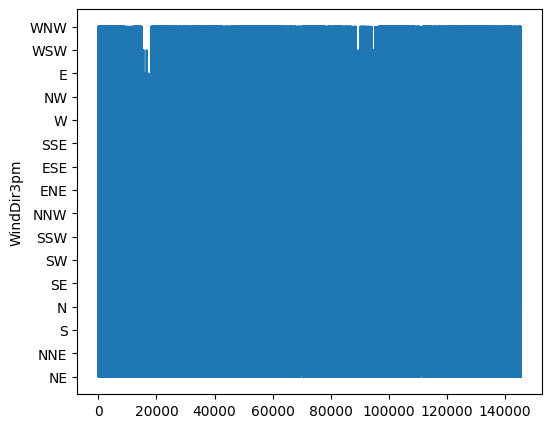

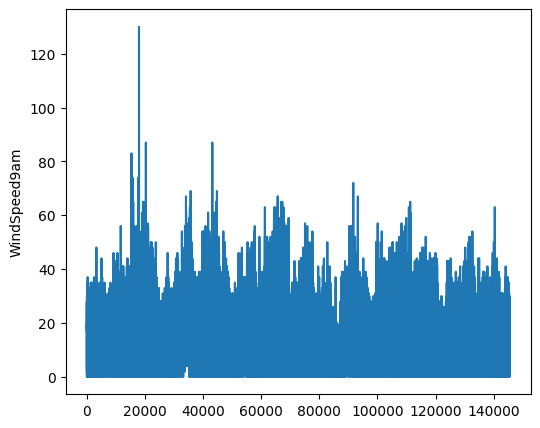

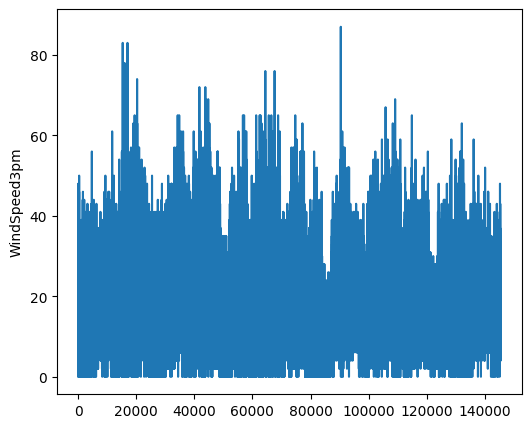

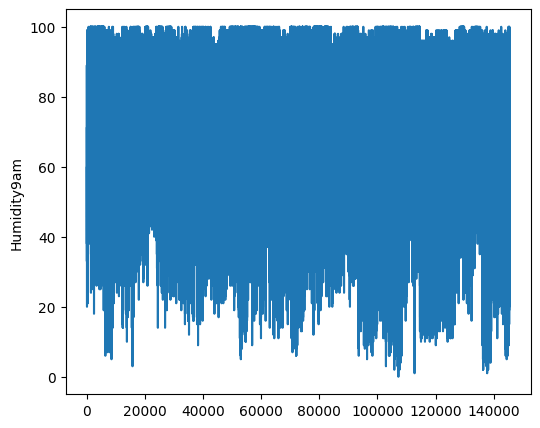

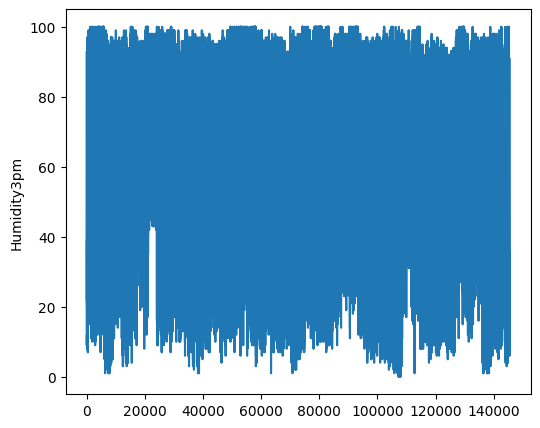

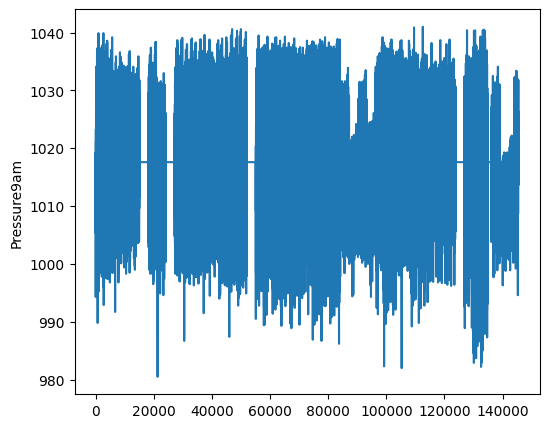

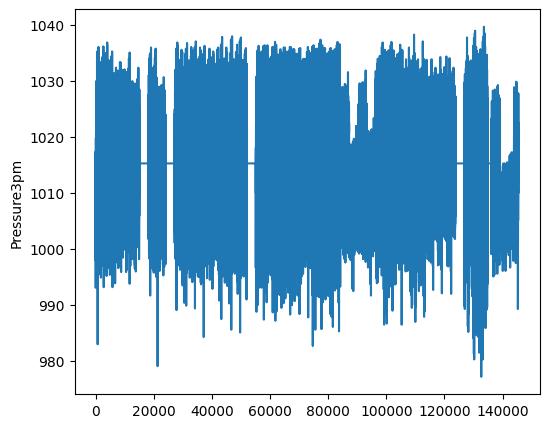

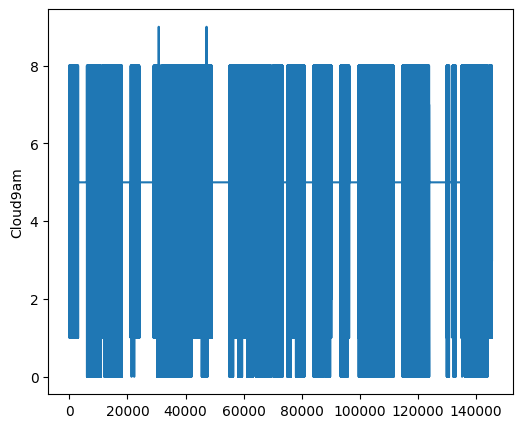

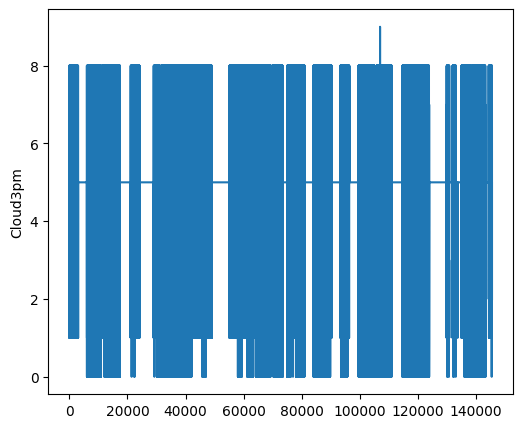

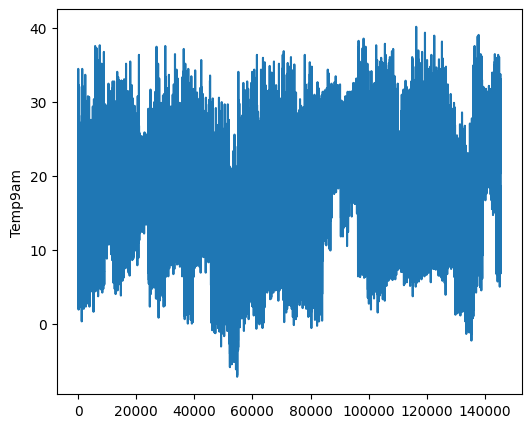

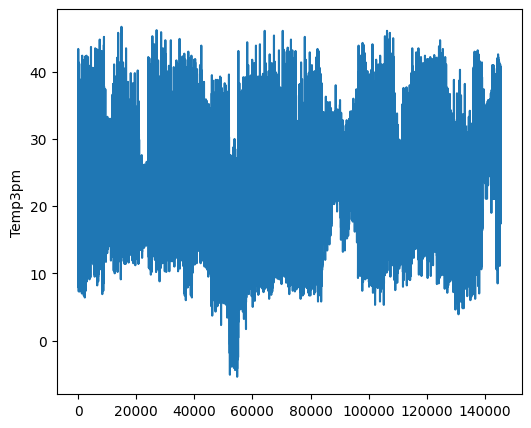

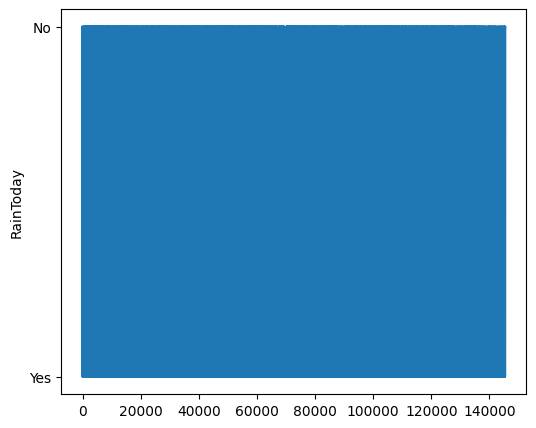

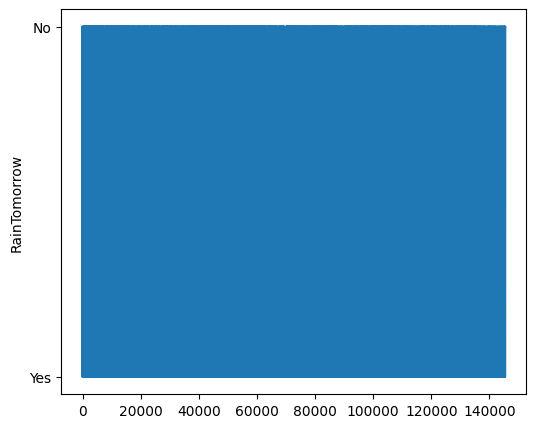

In [26]:
for linep in df.columns:
    plt.figure(figsize=(6,5))
    sb.lineplot(data=df[linep])

C:\Users\BARUN MUKHERJEE\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


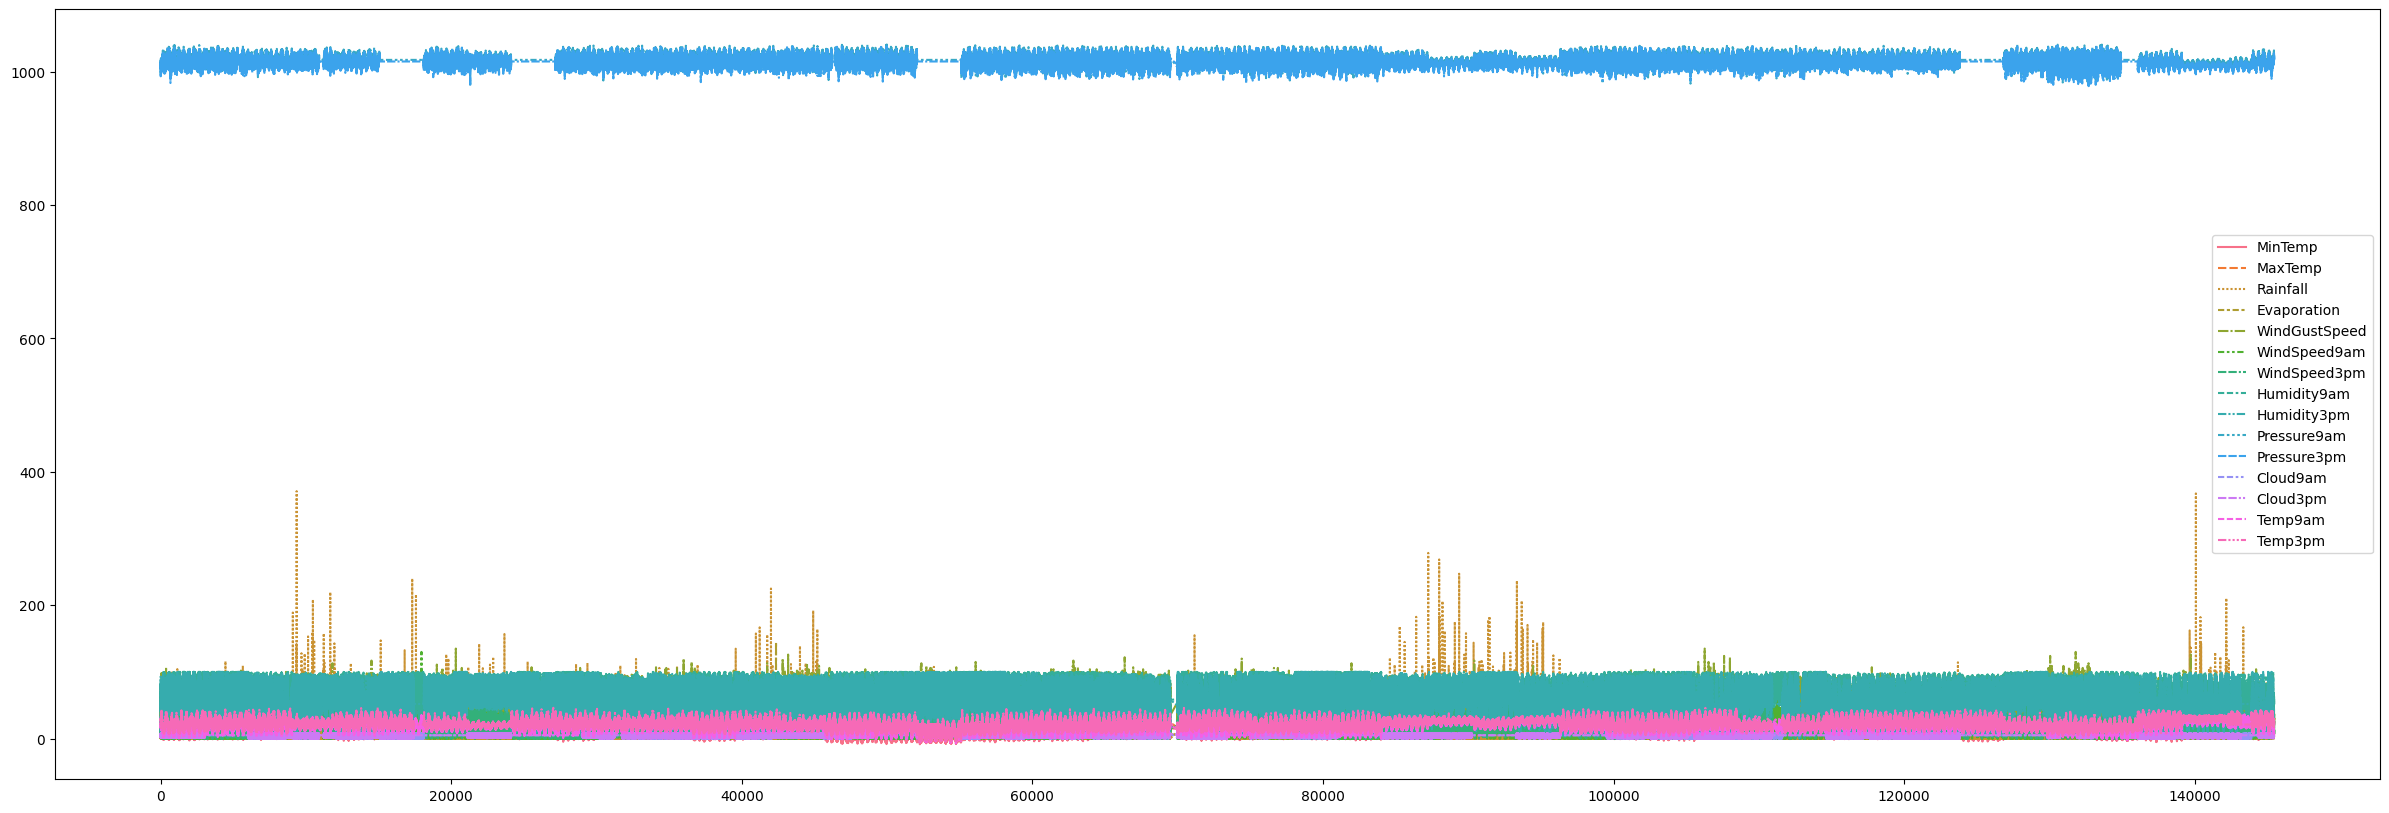

In [27]:
plt.figure(figsize=(30,10))
sb.lineplot(data=df)
plt.show()

##### Heatmap and Correlation Map

<Axes: >

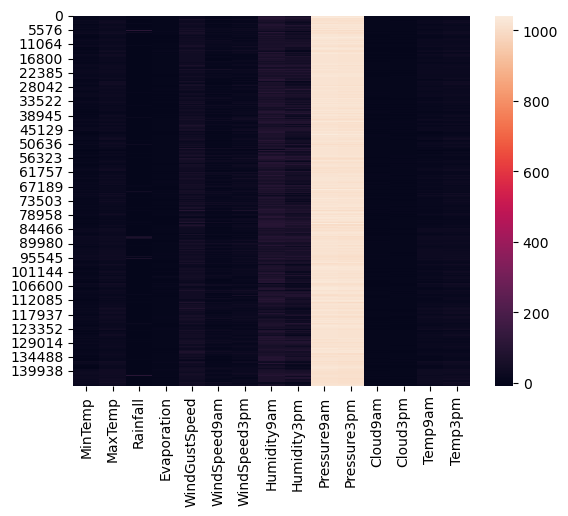

In [23]:
flo_col=df.select_dtypes(include='float')
sb.heatmap(flo_col)

<Axes: >

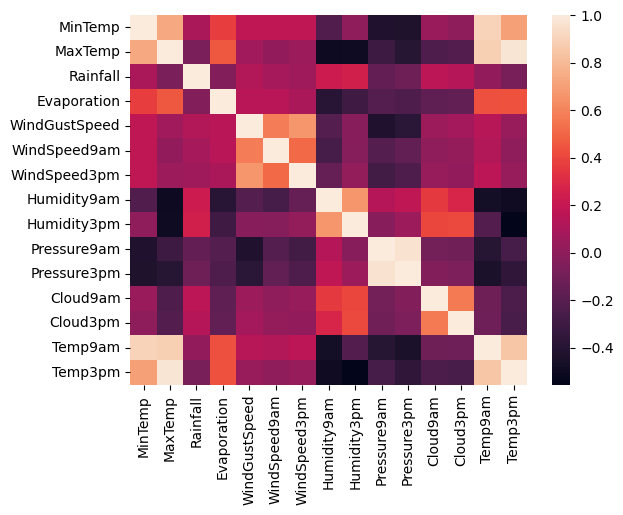

In [24]:
corr_mat=flo_col.corr()
sb.heatmap(corr_mat)

##### Scatterplot

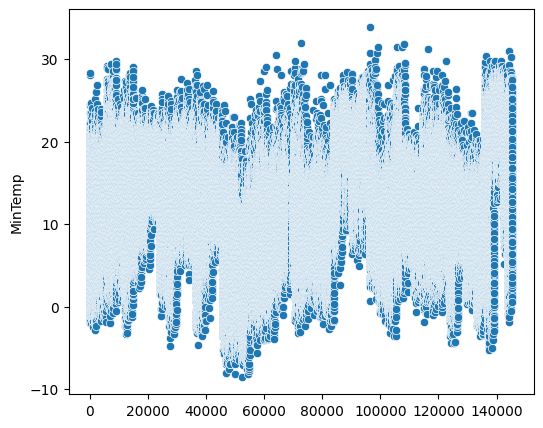

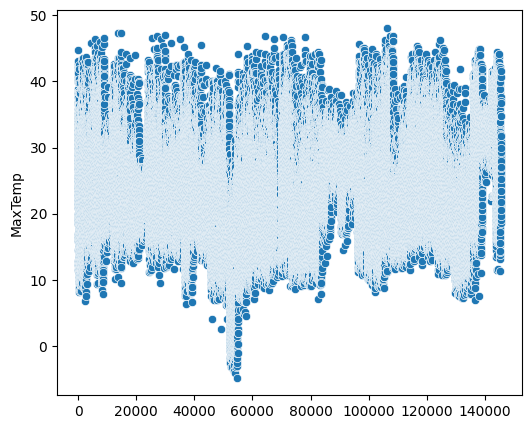

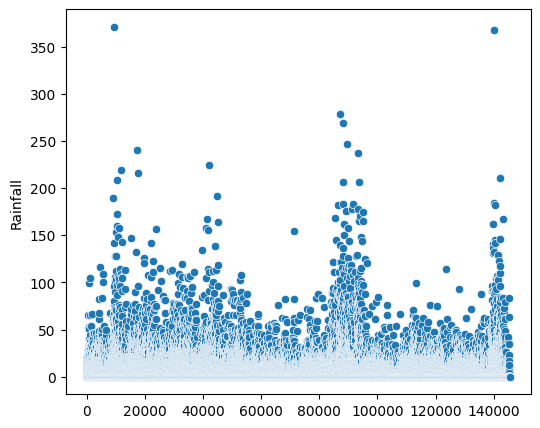

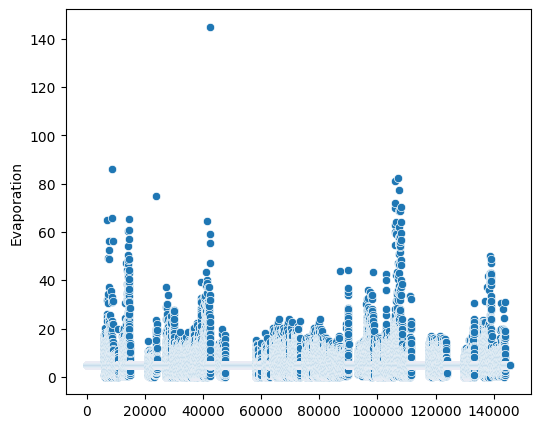

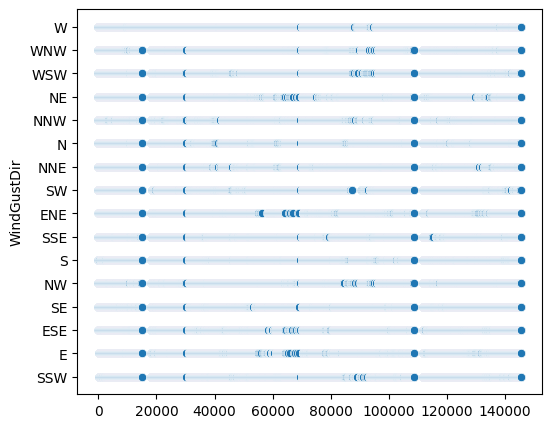

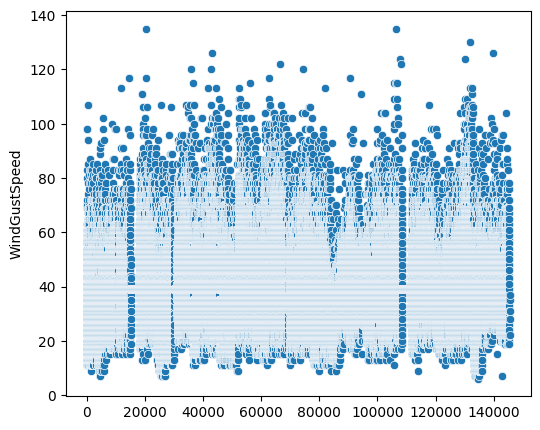

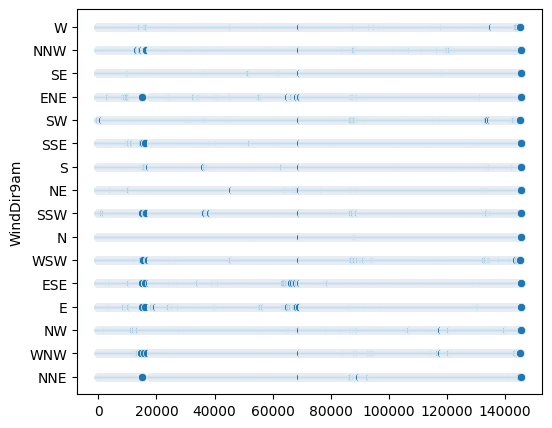

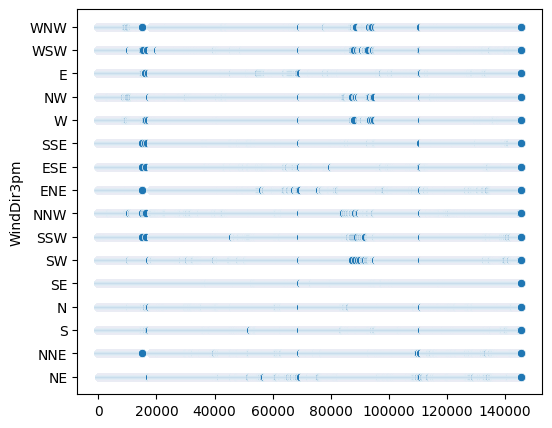

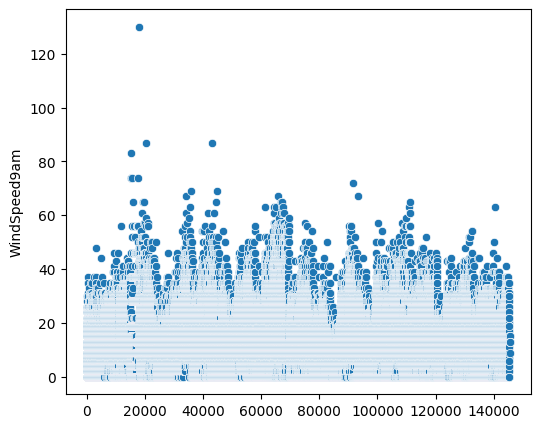

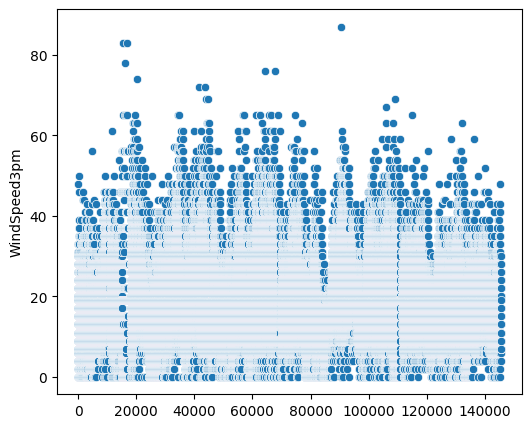

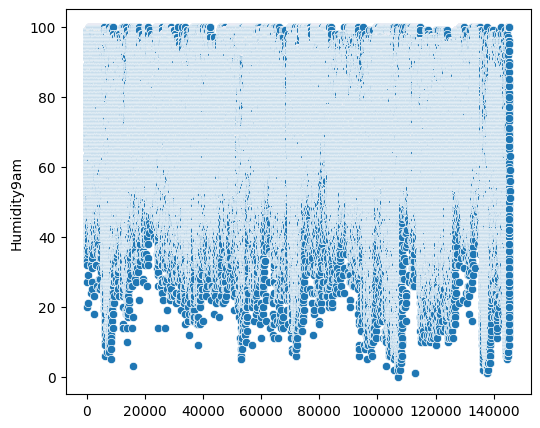

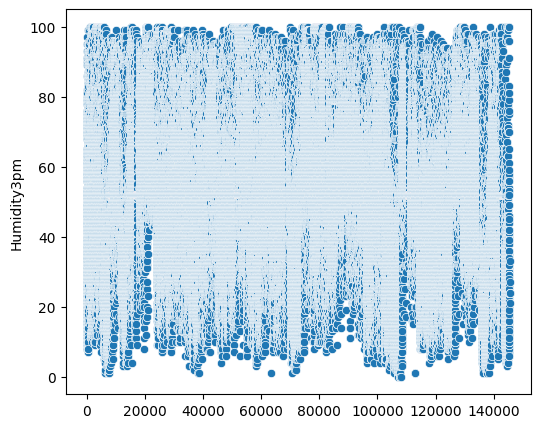

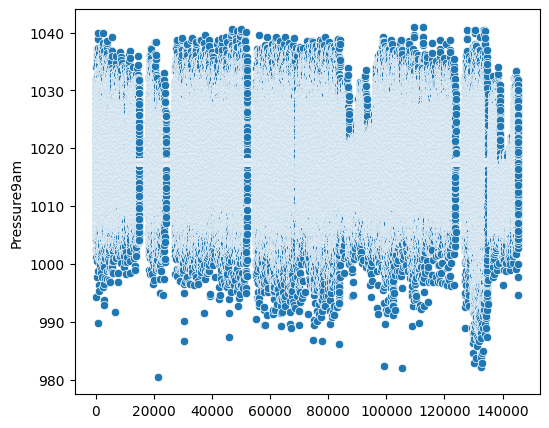

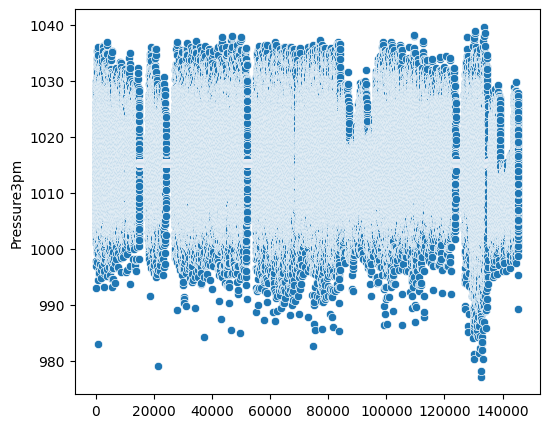

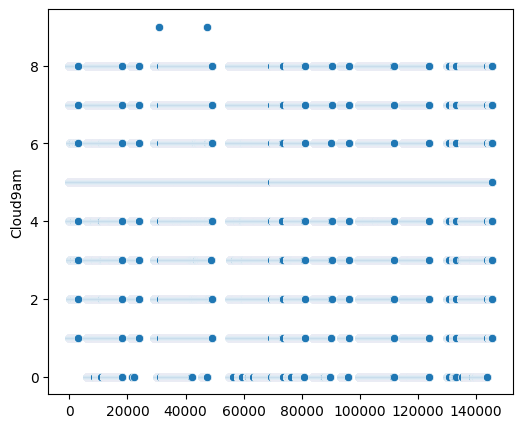

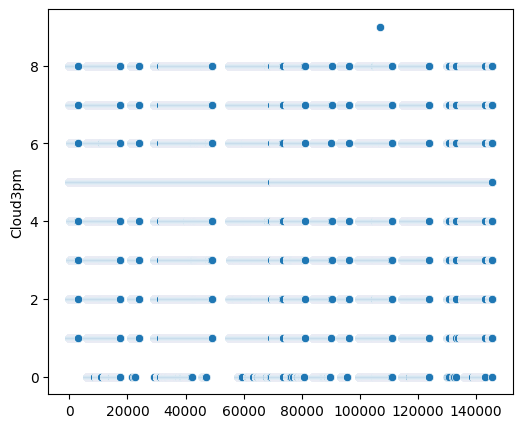

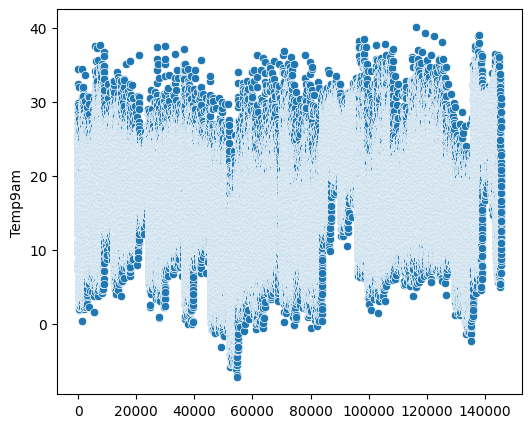

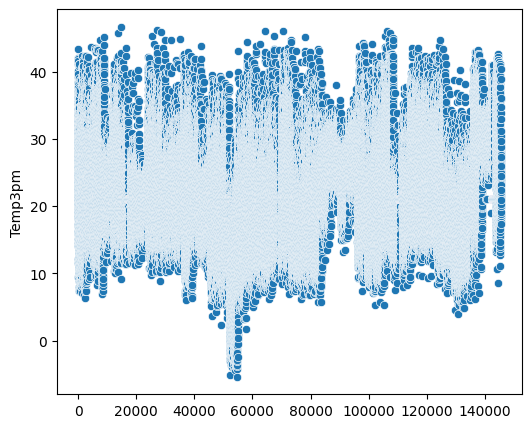

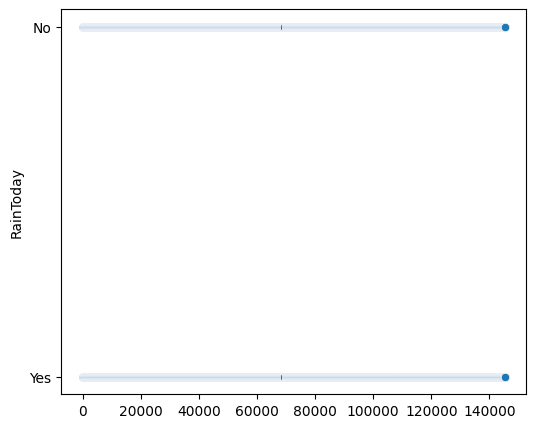

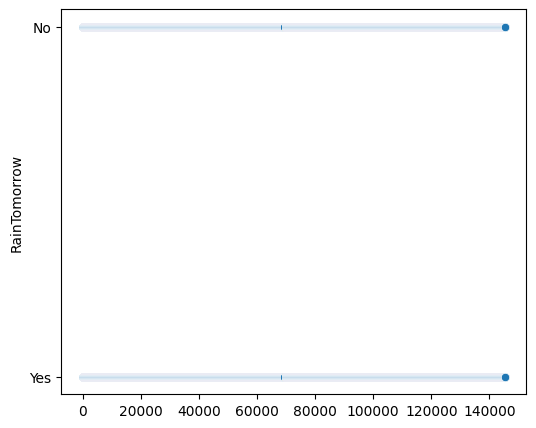

In [30]:
for scatp in df.columns:
    plt.figure(figsize=(6,5))
    sb.scatterplot(df[scatp])

<Axes: >

C:\Users\BARUN MUKHERJEE\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\BARUN MUKHERJEE\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


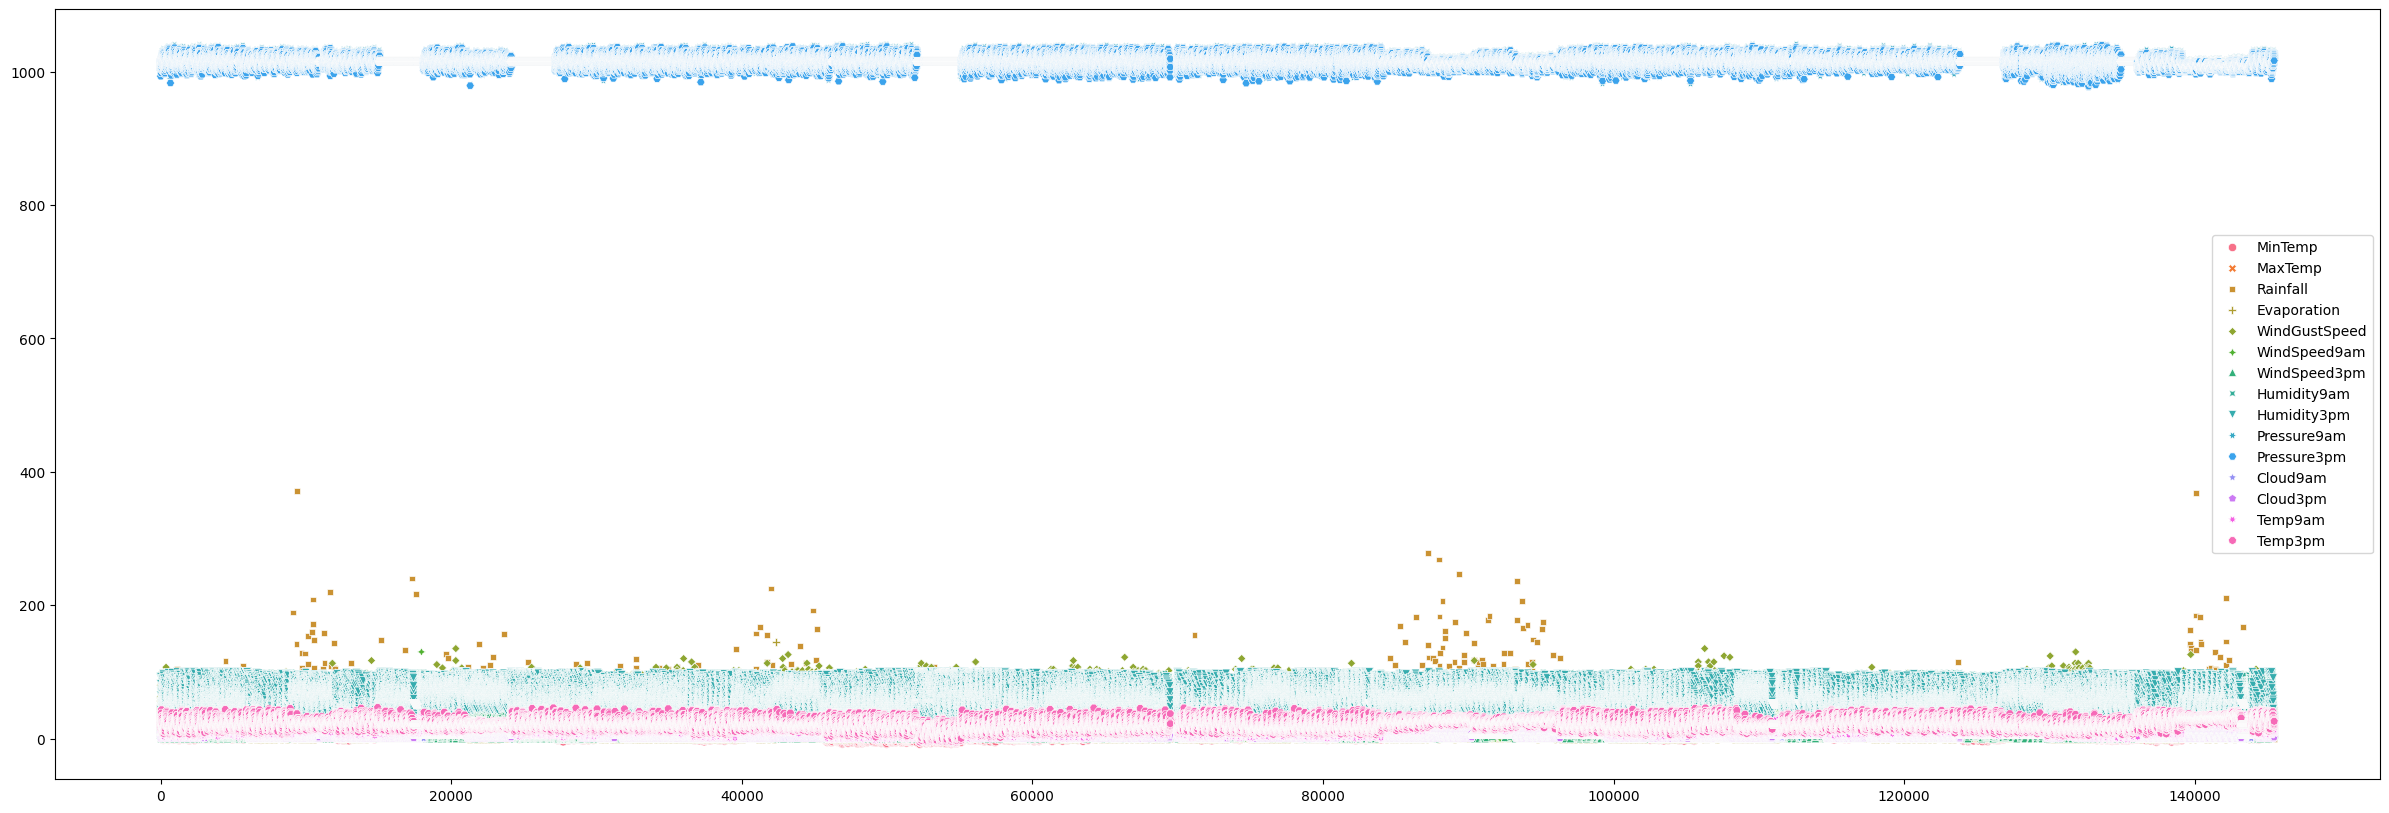

In [31]:
plt.figure(figsize=(30,10))
sb.scatterplot(df)

##### Boxplot

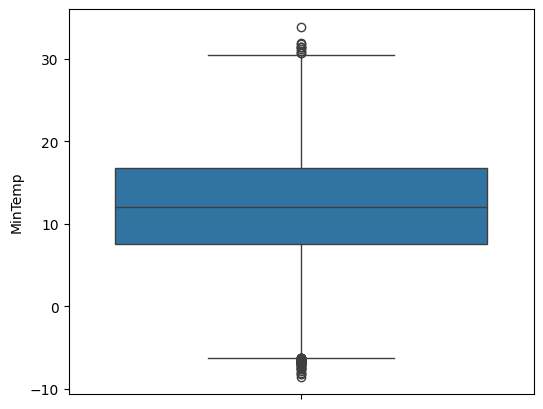

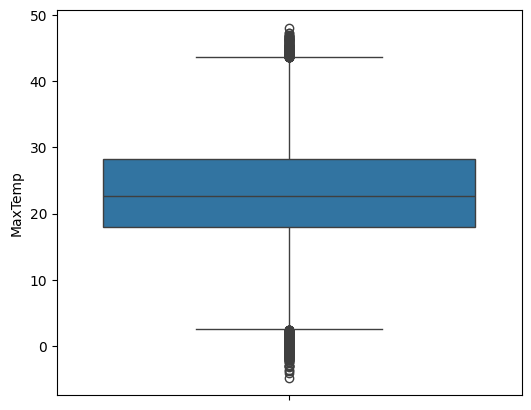

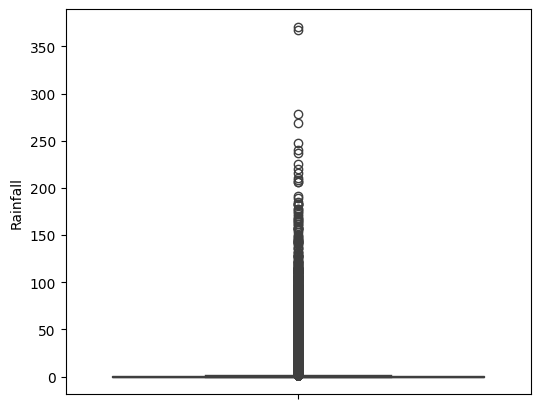

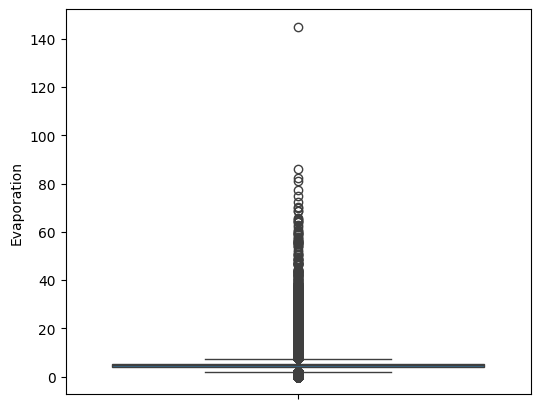

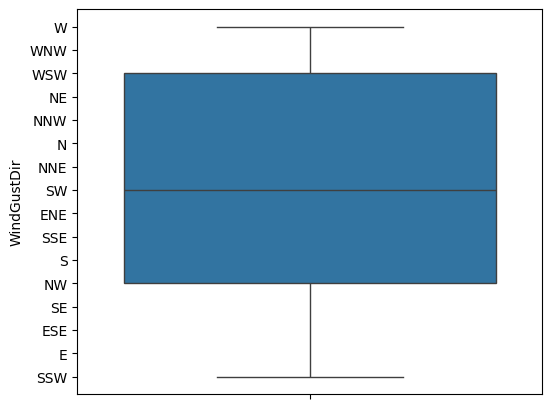

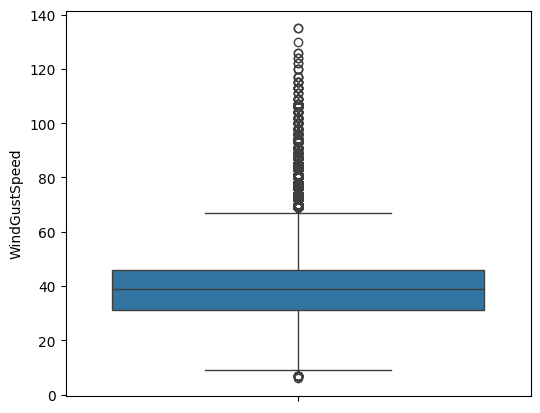

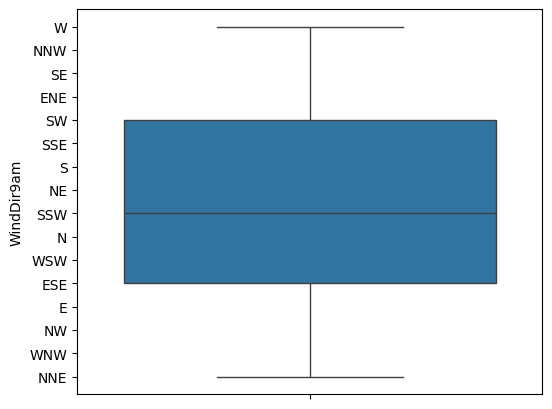

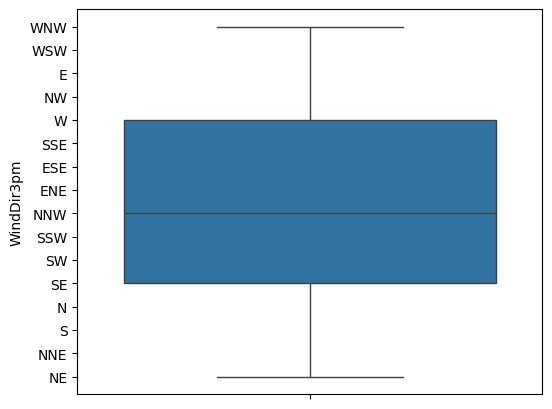

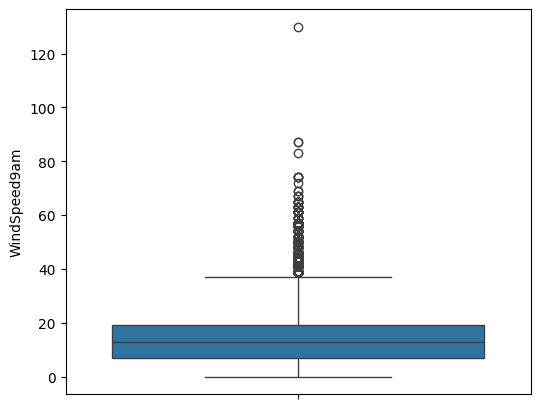

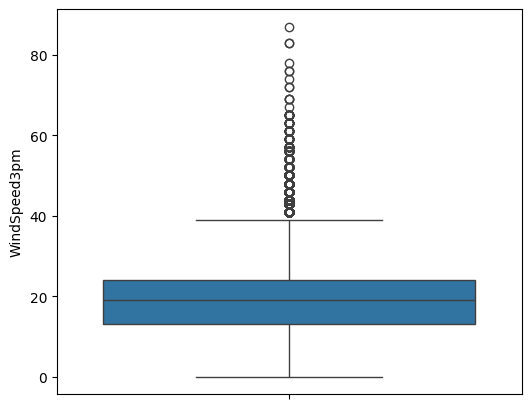

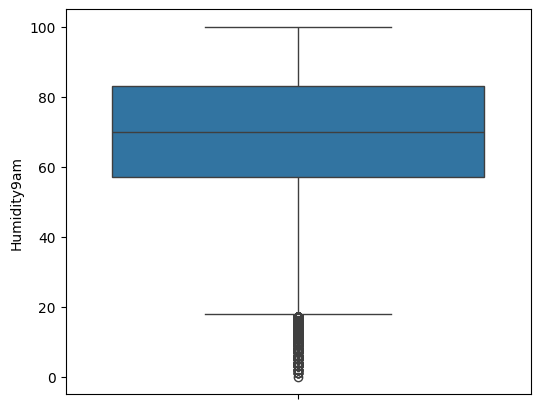

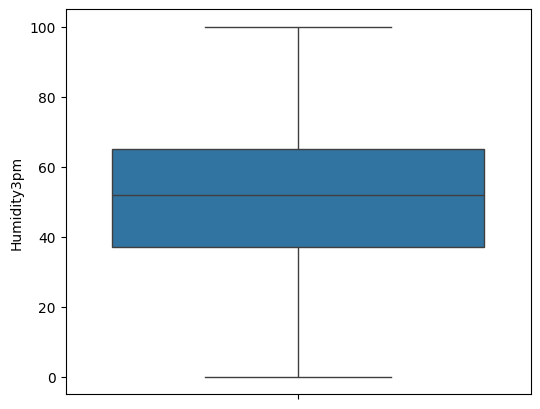

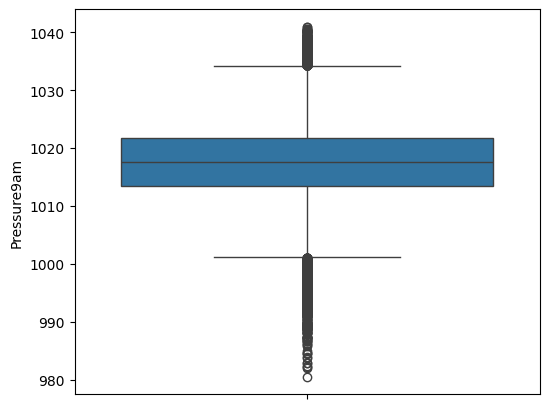

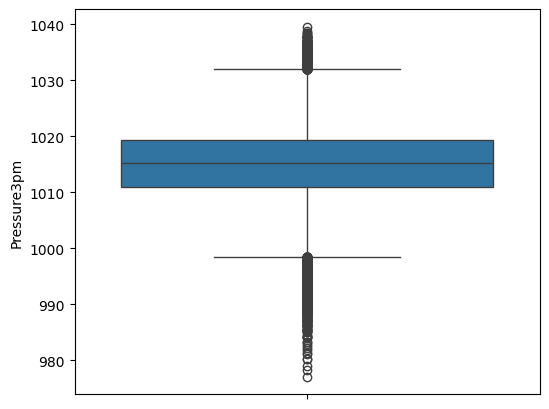

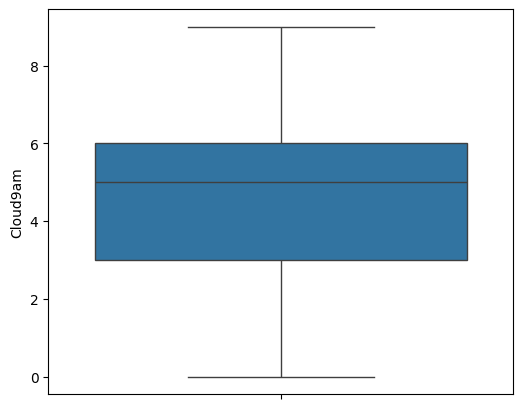

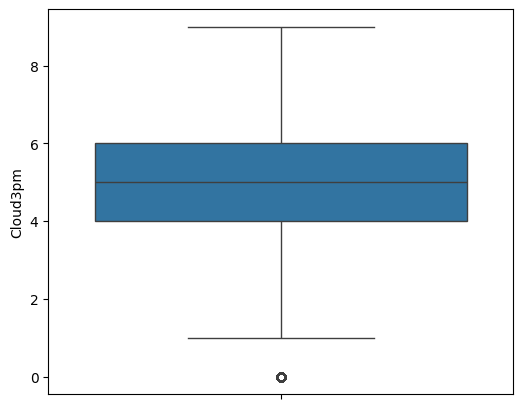

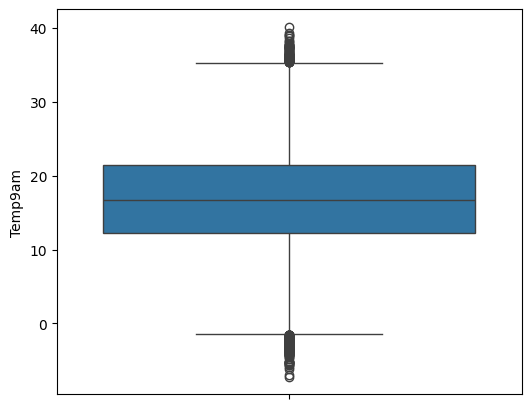

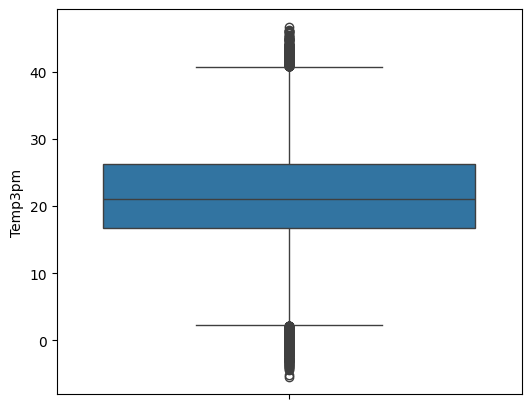

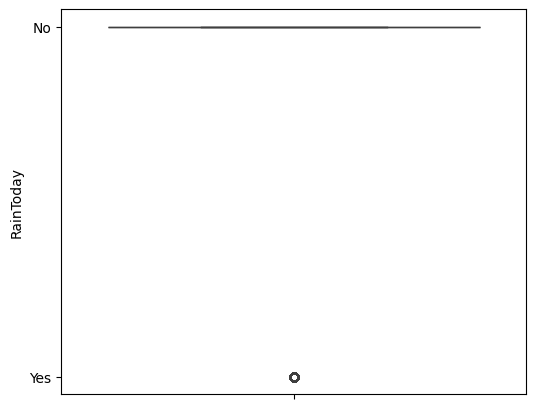

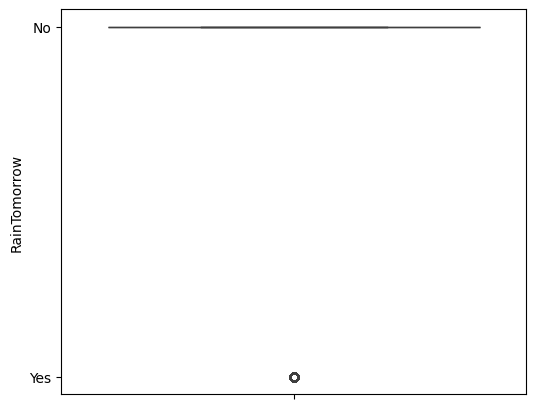

In [32]:
for plot in df.columns:
    plt.figure(figsize=(6,5))
    sb.boxplot(df[plot])

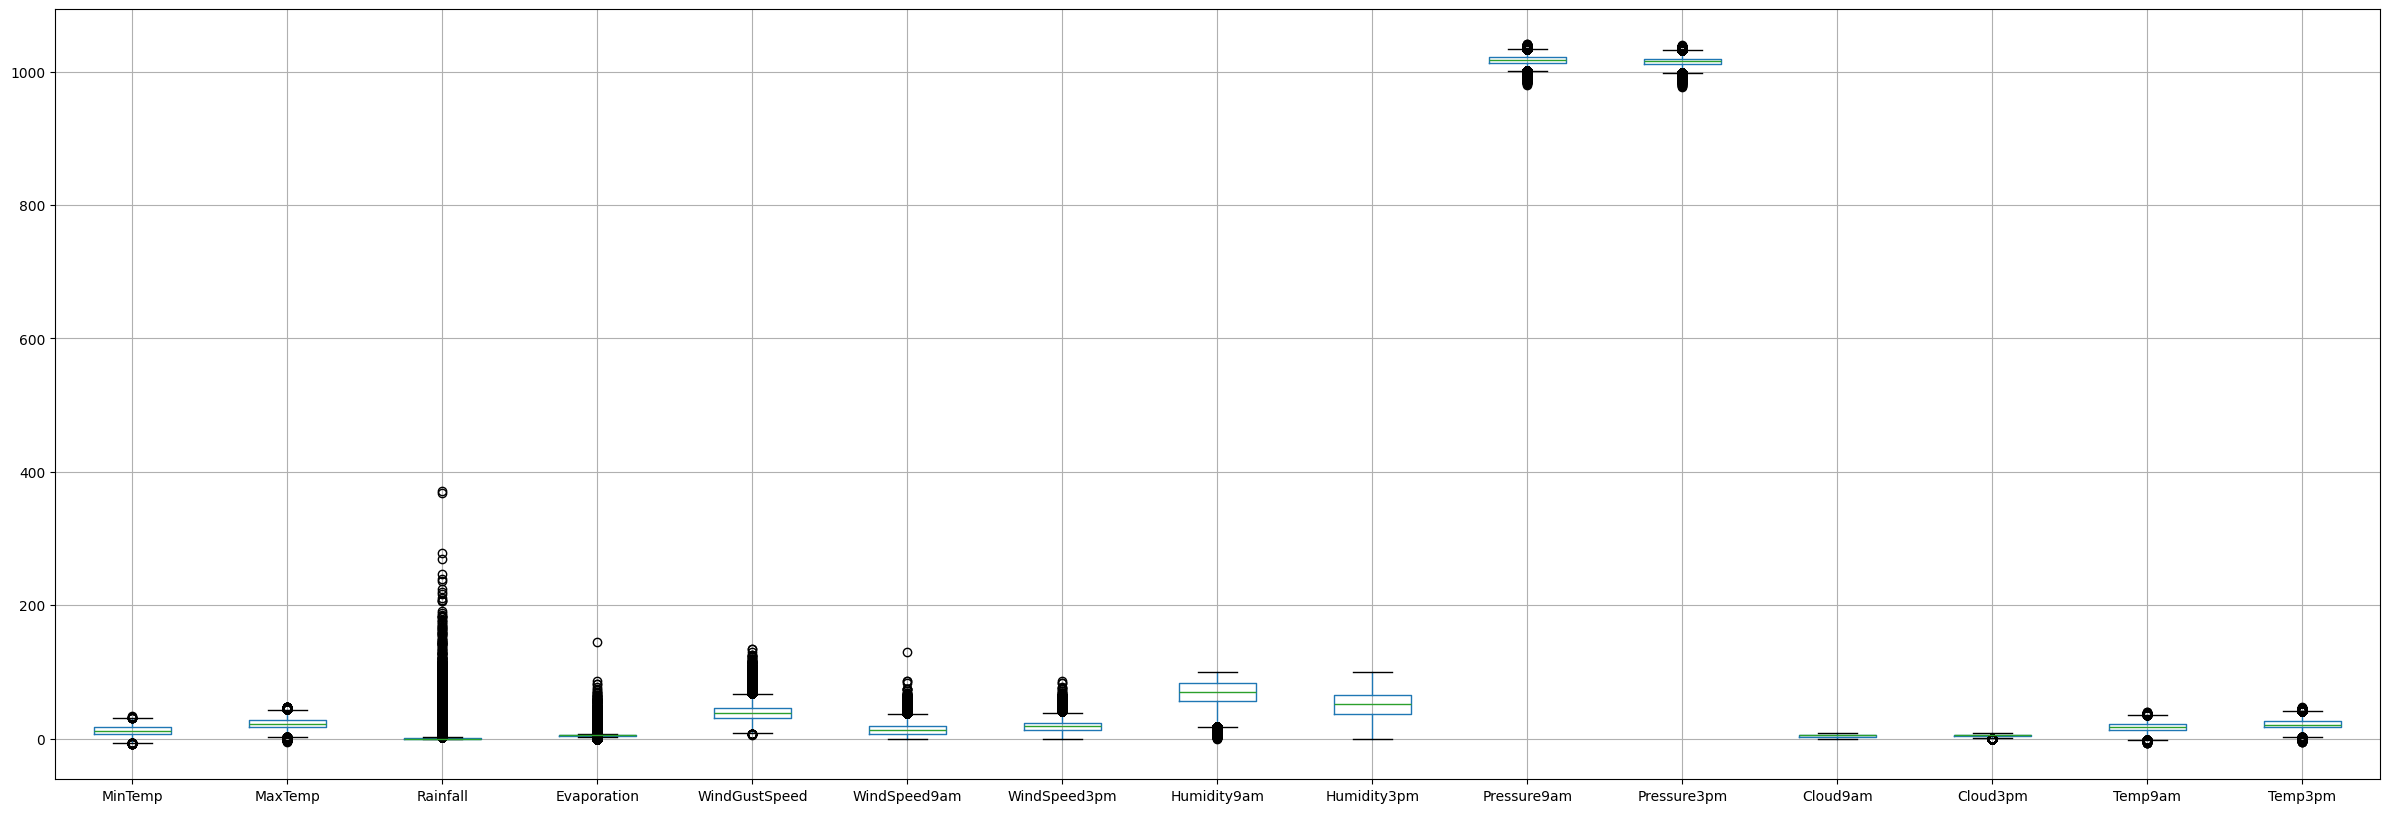

In [33]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.show()

### Removing Outliers

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        140787 non-null  float64
 1   MaxTemp        140787 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    140787 non-null  float64
 4   WindGustDir    140787 non-null  object 
 5   WindGustSpeed  140787 non-null  float64
 6   WindDir9am     140787 non-null  object 
 7   WindDir3pm     140787 non-null  object 
 8   WindSpeed9am   140787 non-null  float64
 9   WindSpeed3pm   140787 non-null  float64
 10  Humidity9am    140787 non-null  float64
 11  Humidity3pm    140787 non-null  float64
 12  Pressure9am    140787 non-null  float64
 13  Pressure3pm    140787 non-null  float64
 14  Cloud9am       140787 non-null  float64
 15  Cloud3pm       140787 non-null  float64
 16  Temp9am        140787 non-null  float64
 17  Temp3pm        140787 non-null  fl

In [26]:
# Start with the full DataFrame
df_cleaned_iqr = df.copy()

# Loop through each numerical column and apply the filter
for col in flo_col:
    Q1 = df_cleaned_iqr[col].quantile(0.25)
    Q3 = df_cleaned_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame in place for each column
    df_cleaned_iqr = df_cleaned_iqr[(df_cleaned_iqr[col] >= lower_bound) & (df_cleaned_iqr[col] <= upper_bound)]

### Skewness Analysis and Removal

##### Skewness Analysis

In [27]:
flo_col.skew()

MinTemp          0.026512
MaxTemp          0.231002
Rainfall         9.888061
Evaporation      5.125584
WindGustSpeed    0.914946
WindSpeed9am     0.779832
WindSpeed3pm     0.634849
Humidity9am     -0.486800
Humidity3pm      0.032842
Pressure9am     -0.099499
Pressure3pm     -0.046699
Cloud9am        -0.546757
Cloud3pm        -0.559368
Temp9am          0.092401
Temp3pm          0.250327
dtype: float64

In [28]:
print(df_cleaned_iqr[flo_col.columns].skew())

MinTemp         -0.047419
MaxTemp          0.194298
Rainfall         3.322653
Evaporation      1.327802
WindGustSpeed    0.188511
WindSpeed9am     0.476710
WindSpeed3pm     0.253731
Humidity9am     -0.116005
Humidity3pm      0.200188
Pressure9am      0.196391
Pressure3pm      0.160672
Cloud9am        -3.726338
Cloud3pm         0.000000
Temp9am         -0.097531
Temp3pm          0.215163
dtype: float64


##### Distplot Graphs(Before)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11520\2960447348.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[distp])
C:\Users\Dell\AppData\Local\Temp\ipykernel_11520\2960447348.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[distp])
C:\Users\Dell\AppData\Local\Temp\ipykernel_11520\296

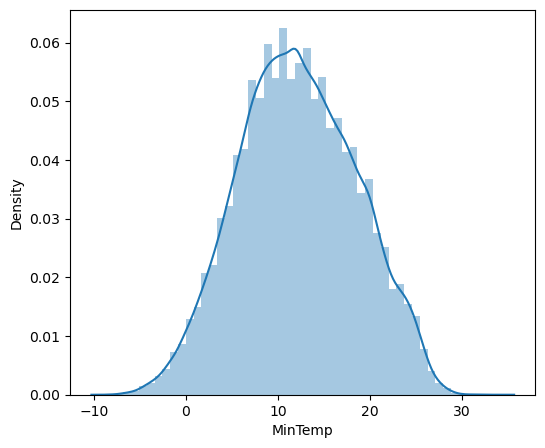

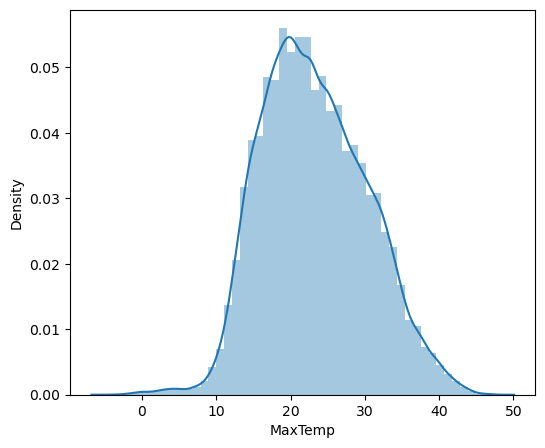

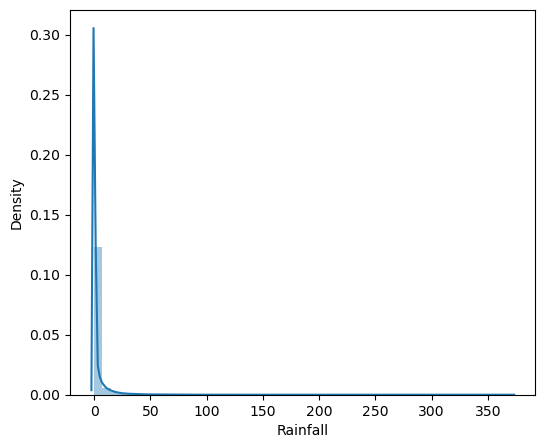

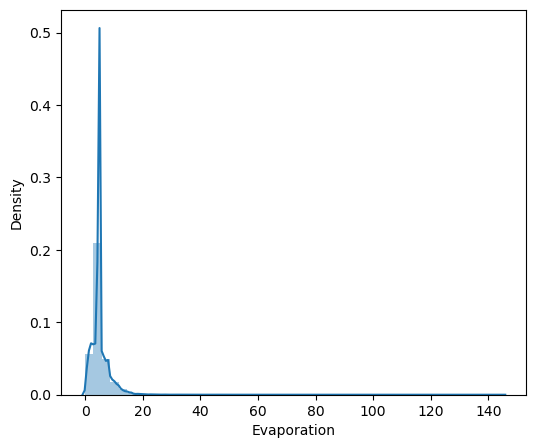

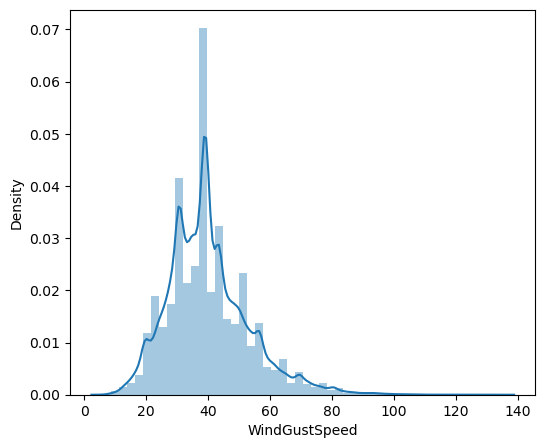

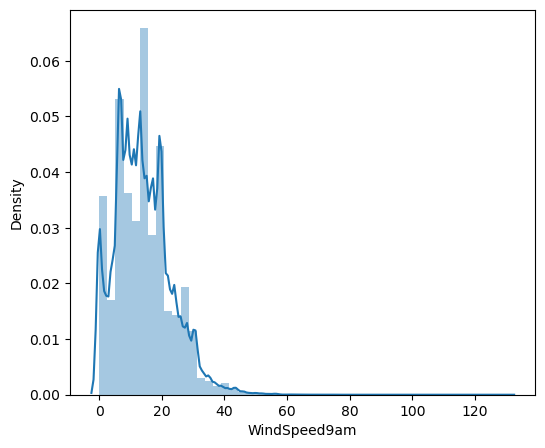

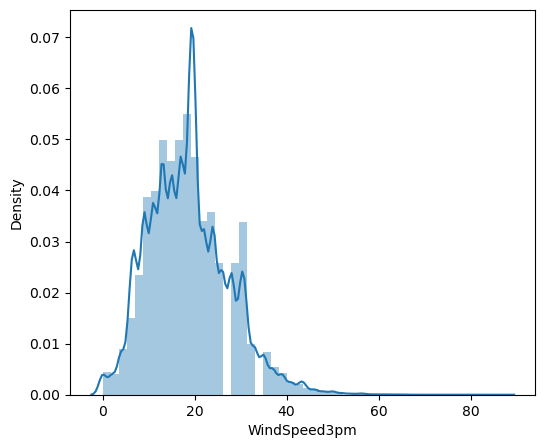

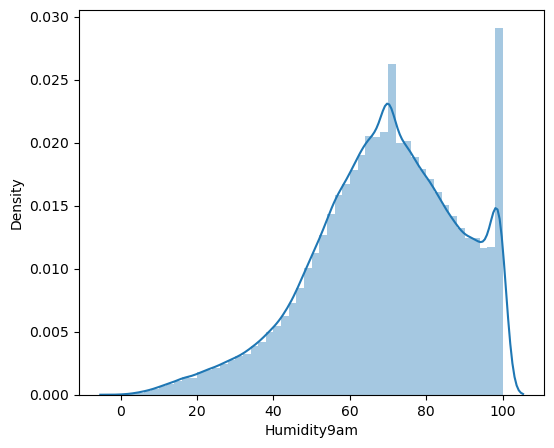

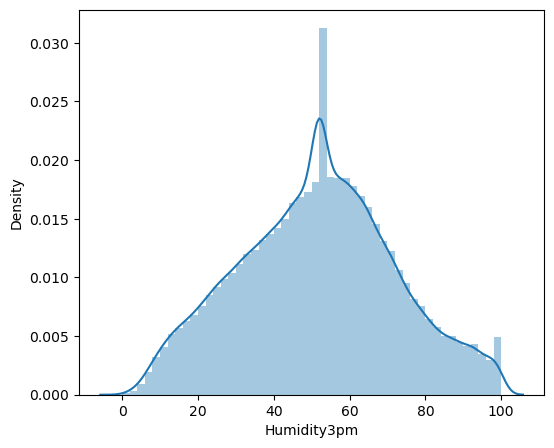

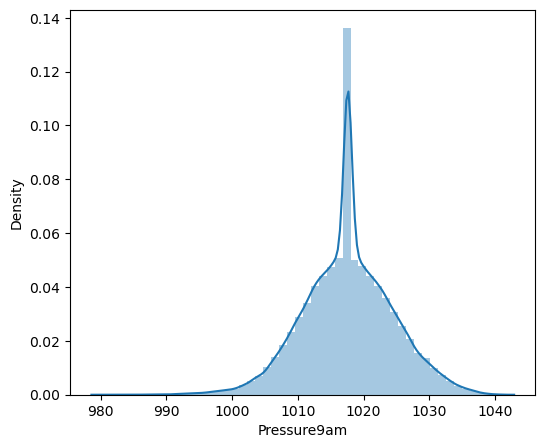

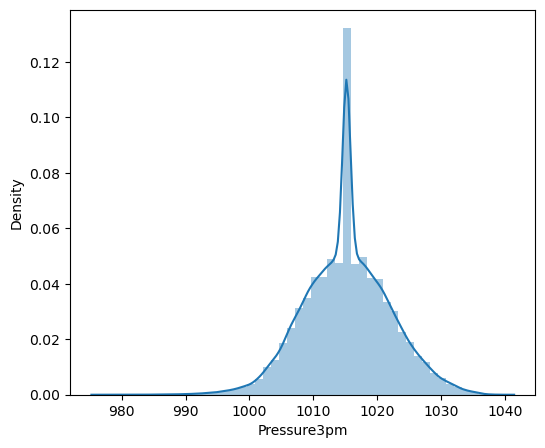

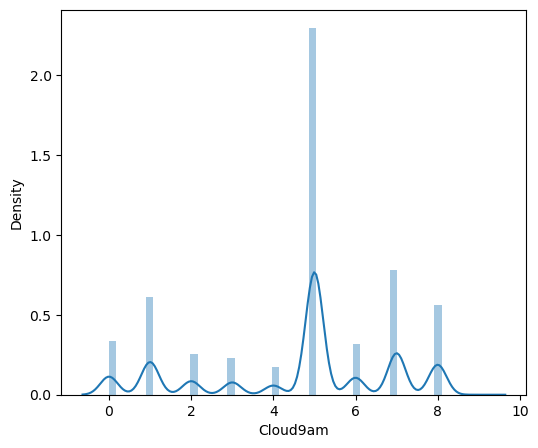

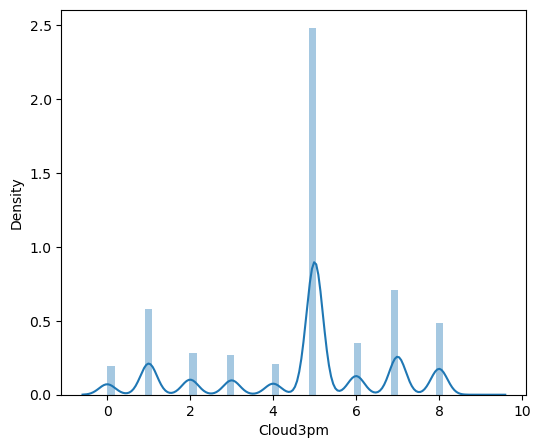

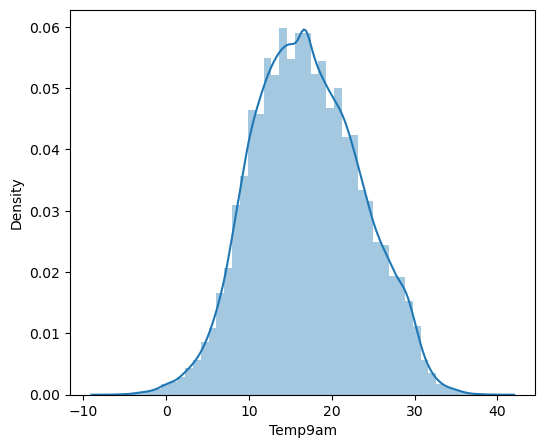

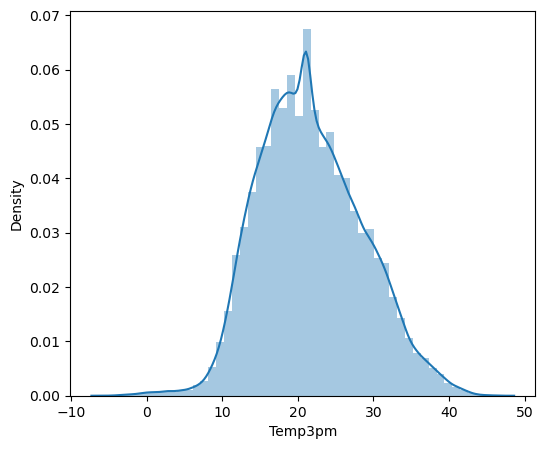

In [38]:
for distp in df_cleaned_iqr[flo_col.columns]:
    plt.figure(figsize=(6,5))
    sb.distplot(df[distp])

##### Skewness Removal


In [29]:
numeric_cols = df_cleaned_iqr.select_dtypes(include=['int64', 'float64']).columns
pt = PowerTransformer(method='yeo-johnson')
df_cleaned_iqr[numeric_cols] = pt.fit_transform(df_cleaned_iqr[numeric_cols])

##### Displot Graphs(After)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12384\2976192036.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_cleaned_iqr[distp])
C:\Users\Dell\AppData\Local\Temp\ipykernel_12384\2976192036.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_cleaned_iqr[distp])
C:\Users\Dell\AppData\Local\

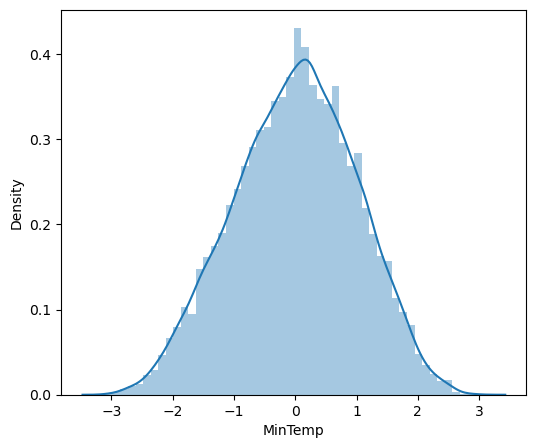

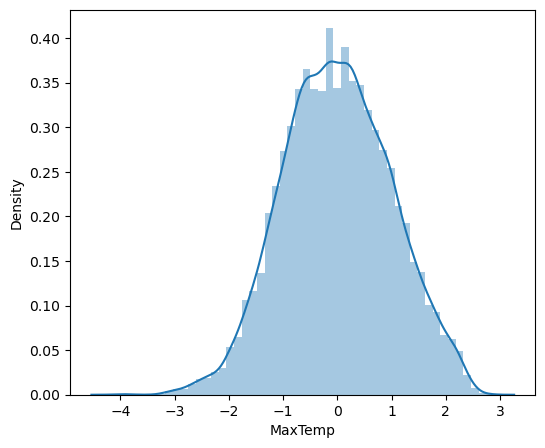

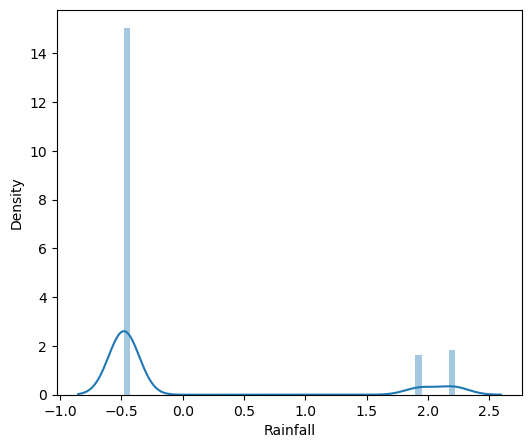

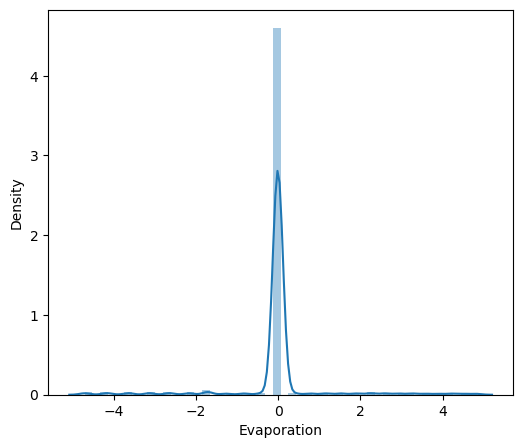

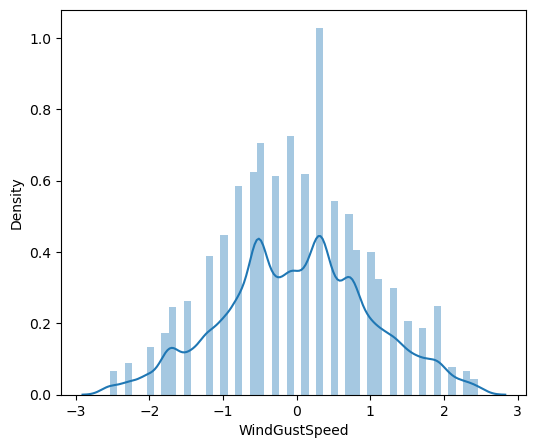

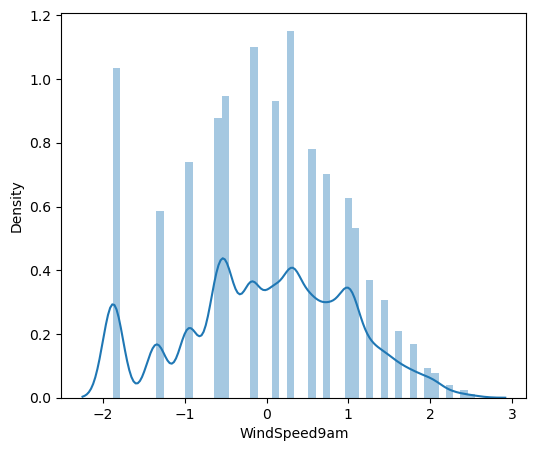

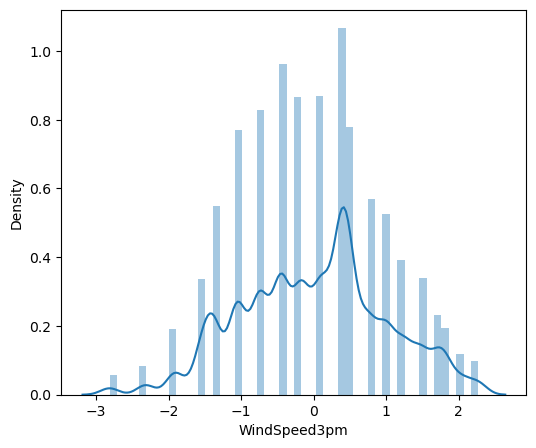

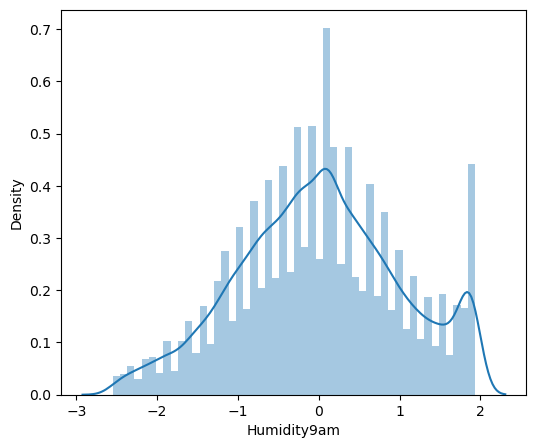

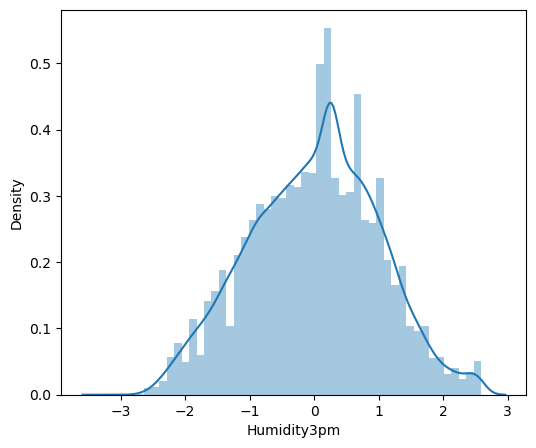

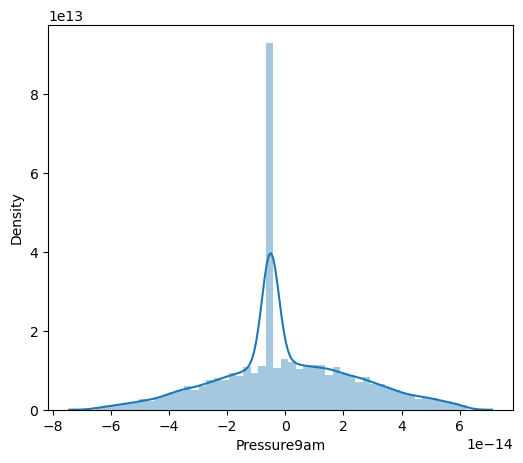

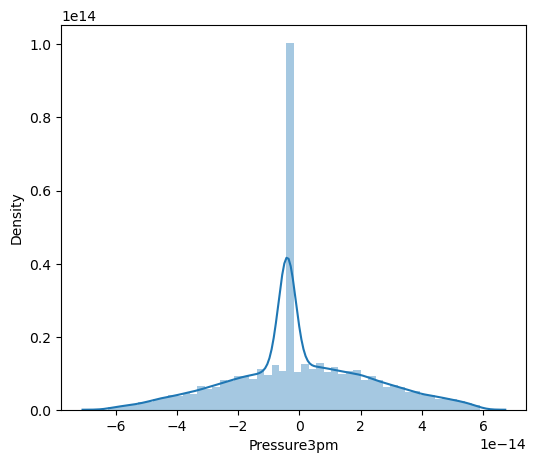

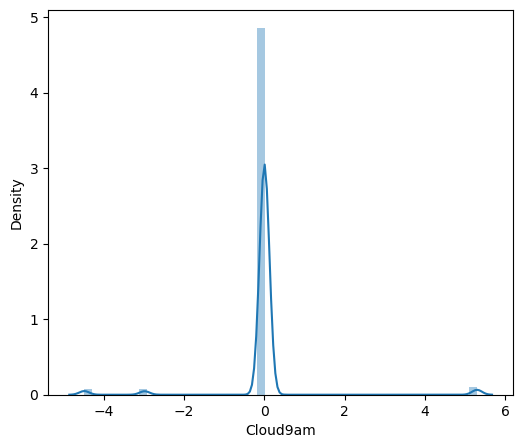

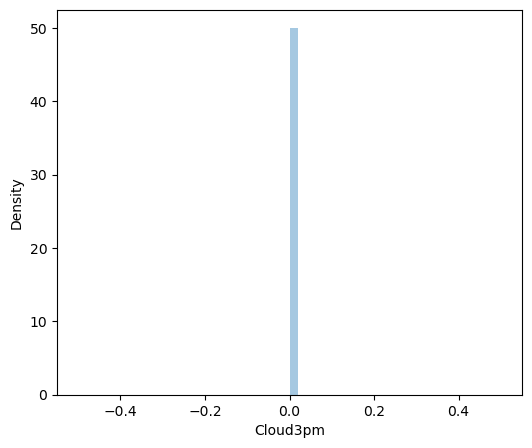

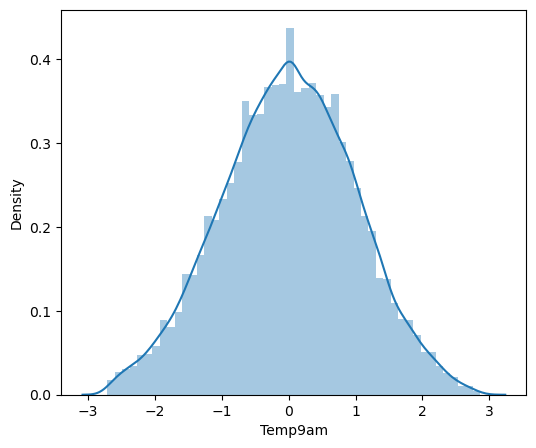

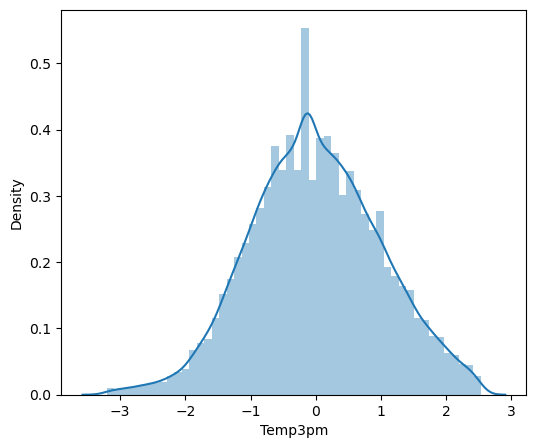

In [33]:
for distp in numeric_cols:
    plt.figure(figsize=(6,5))
    sb.distplot(df_cleaned_iqr[distp])                    

### Label encoding


In [30]:
str_col=df_cleaned_iqr.select_dtypes(include='object')
print(str_col)

       WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
1              WNW        NNW        WSW        No           No
3               NE         SE          E        No           No
5              WNW          W          W        No           No
7                W        SSE          W        No           No
9                W          S        SSE       Yes           No
...            ...        ...        ...       ...          ...
145453           E        ESE          E        No           No
145454           E        ESE          E        No           No
145455           E         SE        ENE        No           No
145456         NNW         SE          N        No           No
145457           N         SE        WNW        No           No

[33807 rows x 5 columns]


In [31]:
#encoded_df = str_col.copy()
encoders={}

for col in str_col.columns:
    le = LabelEncoder()
    str_col[col] = le.fit_transform(str_col[col])
    encoders[col] = le

with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

print("Fitted encoders saved to 'label_encoders.pkl'")
print(str_col)

Fitted encoders saved to 'label_encoders.pkl'
        WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
1                14           6          15          0             0
3                 4           9           0          0             0
5                14          13          13          0             0
7                13          10          13          0             0
9                13           8          10          1             0
...             ...         ...         ...        ...           ...
145453            0           2           0          0             0
145454            0           2           0          0             0
145455            0           9           1          0             0
145456            6           9           3          0             0
145457            3           9          14          0             0

[33807 rows x 5 columns]


In [32]:
df_cleaned_iqr[str_col.columns] = str_col

### Train Test Spilt

In [33]:
targ_cols_classification=['RainToday','RainTomorrow']
y_classification=df_cleaned_iqr[targ_cols_classification]
targ_col1=["Rainfall"]
x_classification=df_cleaned_iqr.drop(y_classification,axis=1)
y_reg=df_cleaned_iqr[targ_col1]
x_reg=df_cleaned_iqr.drop(y_reg,axis=1)

In [34]:
x_classification_train, x_classification_test, y_classification_train, y_classification_test = train_test_split(x_classification, y_classification, test_size=0.2, random_state=42)

### Multicollinearity Removal


#### correlation map(before)

<Axes: >

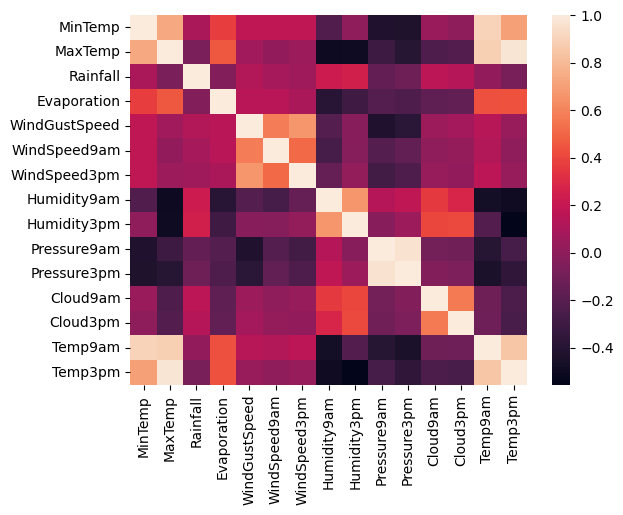

In [35]:
sb.heatmap(corr_mat)

#### correlation map(after)

<Axes: >

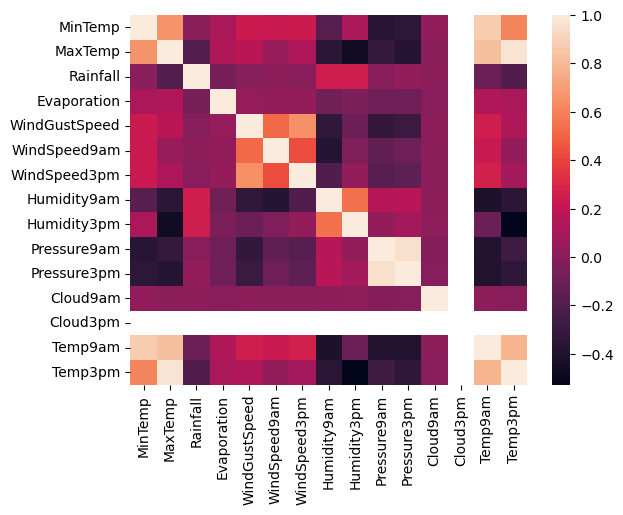

In [36]:
corr_mat1=df_cleaned_iqr[numeric_cols].corr()
sb.heatmap(corr_mat1)

In [37]:
def calculate_vif(X, thresh=10.0):
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        max_vif = vif_data['VIF'].max()
        if max_vif > thresh:
            feature_to_remove = vif_data.sort_values("VIF", ascending=False)['feature'].iloc[0]
            print(f"Removing '{feature_to_remove}' with VIF: {max_vif}")
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    return X


x_train_vif = calculate_vif(x_classification_train.copy(), thresh=10.0)

x_test_vif = x_classification_test[x_train_vif.columns]

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing 'Temp3pm' with VIF: 21.551971548874654


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing 'Pressure9am' with VIF: 13.442443017012602


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing 'Temp9am' with VIF: 12.484689998417894


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


### Now, we have x_train_vif, x_test_vif, y_classification_train and y_classification_test

### Scaling

In [38]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_vif)
x_test_scaled = scaler.transform(x_test_vif)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train_vif.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train_vif.columns)

### Now we have x_train_scaled, x_test_scaled, y_classification_train and y_classification_test

### Oversampling


In [39]:
y_classification_train_res = {}
x_classification_train_res = {}  # Optional: If you want to keep X_res for each target separately

for target_col in ['RainToday', 'RainTomorrow']:
    sm = SMOTE(random_state=42)
    x_res, y_res = sm.fit_resample(x_train_scaled, y_classification_train[target_col])

#Store results
    y_classification_train_res[target_col] = y_res
    x_classification_train_res[target_col] = x_res  # Optional

#For verification
    print(f"Target column: {target_col}")
    print("Original class distribution:", Counter(y_classification_train[target_col]))
    print("Resampled class distribution:", Counter(y_res))
    print("-" * 100)

Target column: RainToday
Original class distribution: Counter({0: 26464, 1: 581})
Resampled class distribution: Counter({0: 26464, 1: 26464})
----------------------------------------------------------------------------------------------------
Target column: RainTomorrow
Original class distribution: Counter({0: 23470, 1: 3575})
Resampled class distribution: Counter({0: 23470, 1: 23470})
----------------------------------------------------------------------------------------------------


In [40]:
# Resampled y for RainToday
y_rain_today = y_classification_train_res['RainToday']


# Resampled y for RainTomorrow
y_rain_tomorrow = y_classification_train_res['RainTomorrow']

# Corresponding features (optional, only needed if stored)
x_rain_today = x_classification_train_res['RainToday']
x_rain_tomorrow = x_classification_train_res['RainTomorrow']

## Model Training for Classification

### Traning Models Using Classification Algorithm (Rain Today)

In [41]:
best_score=0
for state in range(1,10):
    model = RandomForestClassifier(random_state=state)
    model.fit(x_rain_today, y_rain_today)

    score = model.score(x_test_scaled[x_rain_today.columns], y_classification_test["RainToday"])
    if score > best_score:
        best_score = score
        best_state = state

In [42]:
print(best_score,best_state)

1.0 1


In [43]:
# Define the model
model = RandomForestClassifier(random_state=best_state)  # use your best random_state

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 200),           # number of trees
    'max_depth': randint(3, 20),                # depth of trees
    'min_samples_split': randint(2, 10),        # minimum samples to split a node
    'min_samples_leaf': randint(1, 10),         # minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # number of features considered for split
    'bootstrap': [True, False]                  # whether bootstrap samples are used
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=15,           # number of combinations to try
    cv=3,                # 3-fold cross-validation
    scoring='accuracy',  # or 'f1', 'roc_auc', etc.
    random_state=42,
    n_jobs=-1,           # use all available cores
    verbose=2
)

# Fit the model
random_search.fit(x_rain_today, y_rain_today)  # x_train and y_train data

# Get the best model and parameters
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    va

Best Parameters: {'bootstrap': True, 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 70}
Best Score: 1.0


In [44]:
best_score_rain_today=1.0
best_state_rain_today=1
best_params_rain_today=random_search.best_params_
print("Best Parameters:",best_params_rain_today )
#and best_model

Best Parameters: {'bootstrap': True, 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 70}


### Traning Models Using Classification Algorithm (Rain Tomorrow)

In [45]:
best_score=0
for state in range(1,10):
    model = RandomForestClassifier(random_state=state)
    model.fit(x_rain_tomorrow, y_rain_tomorrow)

    score = model.score(x_test_scaled[x_rain_tomorrow.columns], y_classification_test["RainTomorrow"])
    if score > best_score:
        best_score = score
        best_state = state

In [46]:
print(best_score,best_state)

0.8686779059449867 5


In [47]:
# Define the model
model_rain_tomorrow = RandomForestClassifier(random_state=best_state)  # use your best random_state

# Define the hyperparameter distributions
param_dist_rain_tomorrow = {
    'n_estimators': randint(50, 200),           # number of trees
    'max_depth': randint(3, 20),                # depth of trees
    'min_samples_split': randint(2, 10),        # minimum samples to split a node
    'min_samples_leaf': randint(1, 10),         # minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # number of features considered for split
    'bootstrap': [True, False]                  # whether bootstrap samples are used
}

# Set up RandomizedSearchCV
random_search_rain_tomorrow = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=15,           # number of combinations to try
    cv=3,                # 3-fold cross-validation
    scoring='accuracy',  # or 'f1', 'roc_auc', etc.
    random_state=42,
    n_jobs=-1,           # use all available cores
    verbose=2
)

# Fit the model
random_search_rain_tomorrow.fit(x_rain_tomorrow, y_rain_tomorrow)  # x_train and y_train data

# Get the best model and parameters
print("Best Parameters:", random_search_rain_tomorrow.best_params_)
print("Best Score:", random_search_rain_tomorrow.best_score_)
best_model_rain_tomorrow = random_search_rain_tomorrow.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    va

Best Parameters: {'bootstrap': False, 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 51}
Best Score: 0.8938862286766227


In [48]:
best_score_rain_tomorrow= best_score
best_state_rain_tomorrow= best_state
best_params_rain_tomorrow= random_search_rain_tomorrow.best_params_
print(best_score_rain_tomorrow,best_state_rain_tomorrow,best_params_rain_tomorrow, sep="\n")
# and best_model_rain_tomorrow

0.8686779059449867
5
{'bootstrap': False, 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 51}


### Final Model for RandomForestClassifier (Rain Today)

In [49]:
final_model_rain_today = RandomForestClassifier(
    random_state=1,
    **random_search.best_params_
)
final_model_rain_today.fit(x_rain_today, y_rain_today)

RandomForestClassifier(max_depth=17, max_features='log2', min_samples_leaf=8,
                       min_samples_split=6, n_estimators=70, random_state=1)

### Checking the efficiency of the classification model for Rain Today

In [52]:
y_pred_today = final_model_rain_today.predict(x_test_scaled)

# Convert your 2D one-hot encoded y_test back to a 1D array
y_classification_test_1d = np.argmax(y_classification_test, axis=1)

# Now, use the 1D version for all your metrics
print("--- Evaluation Results ---")
accuracy = accuracy_score(y_classification_test_1d, y_pred_today)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_classification_test_1d, y_pred_today))

--- Evaluation Results ---
Accuracy: 0.8520

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      5908
           1       0.00      0.00      0.00       854

    accuracy                           0.85      6762
   macro avg       0.44      0.49      0.46      6762
weighted avg       0.76      0.85      0.80      6762




Confusion Matrix:
[[5761  147]
 [ 854    0]]


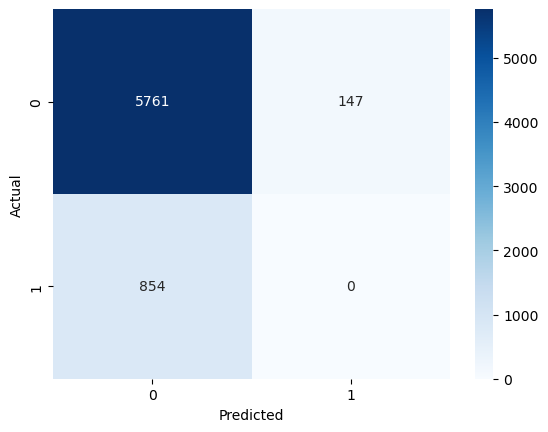

In [53]:
# 3. Display the Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_classification_test_1d, y_pred_today)
print(cm)

# Visualize the confusion matrix with a heatmap for clarity
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Final Model for RandomForestClassifier (Rain Tomorrow)

In [54]:
final_model_rain_tomorrow = RandomForestClassifier(
    random_state=5,
    **random_search_rain_tomorrow.best_params_
)
final_model_rain_tomorrow.fit(x_rain_tomorrow, y_rain_tomorrow)

RandomForestClassifier(bootstrap=False, max_depth=19, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=51, random_state=5)

In [55]:
y_pred_tomorrow = final_model_rain_tomorrow.predict(x_test_scaled)

# Convert your 2D one-hot encoded y_test back to a 1D array
y_classification_test_1d_tomorrow = np.argmax(y_classification_test, axis=1)

# Now, use the 1D version for all your metrics
print("--- Evaluation Results ---")
accuracy = accuracy_score(y_classification_test_1d_tomorrow, y_pred_tomorrow)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_classification_test_1d_tomorrow, y_pred_tomorrow))

--- Evaluation Results ---
Accuracy: 0.8500

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5908
           1       0.42      0.49      0.45       854

    accuracy                           0.85      6762
   macro avg       0.67      0.70      0.68      6762
weighted avg       0.86      0.85      0.85      6762




Confusion Matrix:
[[5331  577]
 [ 437  417]]


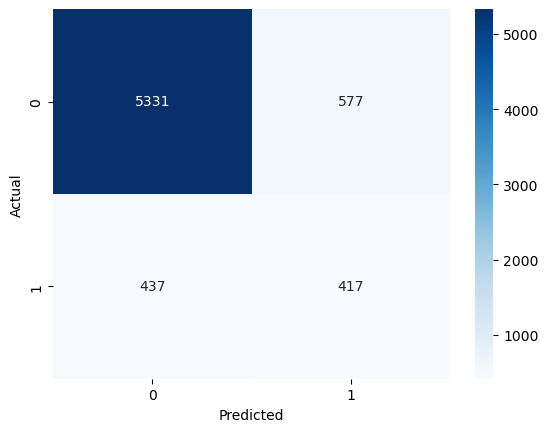

In [56]:
# 3. Display the Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_classification_test_1d_tomorrow, y_pred_tomorrow)
print(cm)

# Visualize the confusion matrix with a heatmap for clarity
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Training for Regression

In [57]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

### Multicollinearity Removal

<Axes: >

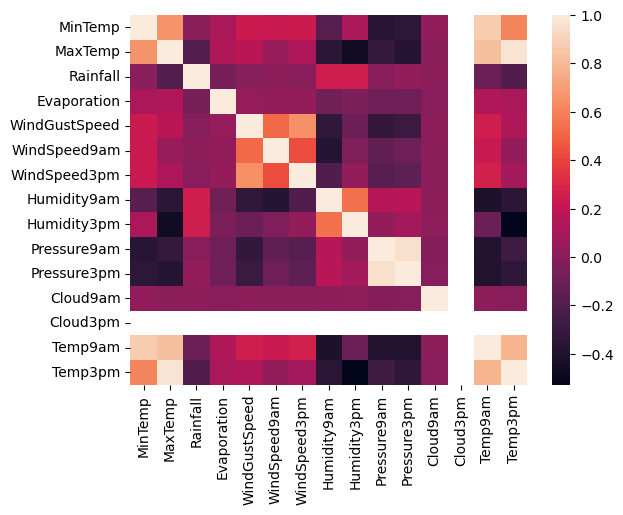

In [58]:
corr_mat1=df_cleaned_iqr[numeric_cols].corr()
sb.heatmap(corr_mat1)

In [59]:
def calculate_vif(X, thresh=10.0):
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        max_vif = vif_data['VIF'].max()
        if max_vif > thresh:
            feature_to_remove = vif_data.sort_values("VIF", ascending=False)['feature'].iloc[0]
            print(f"Removing '{feature_to_remove}' with VIF: {max_vif}")
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    return X


x_train_vif_reg = calculate_vif(x_reg_train.copy(), thresh=10.0)

x_test_vif_reg = x_reg_test[x_train_vif_reg.columns]

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing 'Temp3pm' with VIF: 21.55536779884463


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing 'Pressure3pm' with VIF: 13.659224744610393


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing 'Temp9am' with VIF: 12.505223524914294


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


### Now we have x_train_vif_reg, x_test_vif_reg, y_reg_train and y_reg_test

### Scaling

In [60]:
scaler_reg = StandardScaler()
x_train_scaled_reg = scaler.fit_transform(x_train_vif_reg)
x_test_scaled_reg = scaler.transform(x_test_vif_reg)

x_train_scaled_reg = pd.DataFrame(x_train_scaled_reg, columns=x_train_vif_reg.columns)
x_test_scaled_reg = pd.DataFrame(x_test_scaled_reg, columns=x_train_vif_reg.columns)

### Now we have x_train_scaled_reg, x_test_scaled_reg, y_reg_train and y_reg_test

### Oversampling

In [61]:
def custom_smoter(X, y, n_samples=100, k_neighbors=5, relevance_threshold=None):
    """
    Custom SMOTER-like oversampling for regression.

    Parameters:
        X (DataFrame): Feature matrix.
        y (Series): Target column.
        n_samples (int): Number of new samples to generate.
        k_neighbors (int): Number of neighbors to use for interpolation.
        relevance_threshold (float or None): Threshold to define "rare" targets. If None, uses 10th and 90th percentile.

    Returns:
        X_resampled, y_resampled: Augmented feature and target data.
    """
    X = pd.DataFrame(X)
    y = pd.Series(y)

    # Define relevance threshold if not provided
    if relevance_threshold is None:
        lower_thresh = y.quantile(0.10)
        upper_thresh = y.quantile(0.90)
    else:
        lower_thresh, upper_thresh = relevance_threshold

    # Identify rare samples
    rare_mask = (y < lower_thresh) | (y > upper_thresh)
    X_rare = X[rare_mask]
    y_rare = y[rare_mask]

    # Initialize model
    knn = KNeighborsRegressor(n_neighbors=k_neighbors)
    knn.fit(X_rare, y_rare)

    synthetic_X = []
    synthetic_y = []

    for _ in range(n_samples):
        idx = np.random.randint(0, len(X_rare))
        x_seed = X_rare.iloc[idx].values.reshape(1, -1)
        neighbors = knn.kneighbors(x_seed, return_distance=False)
        neighbor_idx = np.random.choice(neighbors[0])
        x_neighbor = X_rare.iloc[neighbor_idx].values

        # Random interpolation
        lam = np.random.uniform()
        x_new = lam * x_seed + (1 - lam) * x_neighbor.reshape(1, -1)
        y_new = lam * y_rare.iloc[idx] + (1 - lam) * y_rare.iloc[neighbor_idx]

        synthetic_X.append(x_new.flatten())
        synthetic_y.append(y_new)

    # Combine with original data
    X_augmented = pd.concat([X, pd.DataFrame(synthetic_X, columns=X.columns)], ignore_index=True)
    y_augmented = pd.concat([y, pd.Series(synthetic_y)], ignore_index=True)

    return X_augmented, y_augmented

In [62]:
y_reg_train = pd.Series(np.array(y_reg_train).flatten())
x_res_reg, y_res_reg = custom_smoter(x_train_scaled_reg,y_reg_train, n_samples=200)

print("Original:", x_train_scaled_reg.shape,y_reg_train.shape)
print("Resampled:", x_res_reg.shape, y_res_reg.shape)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Program

Original: (27045, 16) (27045,)
Resampled: (27245, 16) (27245,)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Program

### Now we have x_res_reg,y_res_reg and x_test_scaled_reg,y_reg_test

### Traning Model Using KNeighborsRegressor

In [63]:
# Initialize the model
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors

# Fit the model to the resampled training data
knn.fit(x_res_reg, y_res_reg)  # ravel() flattens y_res if it's shaped (n, 1)

# Predict on test set
y_pred_reg = knn.predict(x_test_scaled_reg)

# Evaluate performance
mse = mean_squared_error(y_reg_test, y_pred_reg)
r2 = r2_score(y_reg_test, y_pred_reg)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error (MSE): 0.924
R² Score: 0.080


##### Hyperparameter Tuning

In [64]:
# Define the model
knn = KNeighborsRegressor()

# Define the hyperparameter distribution
param_dist_reg = {
    'n_neighbors': list(range(1, 31)),            # Number of neighbors to test
    'weights': ['uniform', 'distance'],           # Weight function
    'p': [1, 2]                                    # Distance metric (1=Manhattan, 2=Euclidean)
}

# Set up randomized search
random_search_reg = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist_reg,
    n_iter=15,             # Number of combinations to try
    scoring='r2',          # Use R² as scoring for regression
    cv=3,                  # 3-fold cross-validation
    random_state=42,
    n_jobs=-1              # Use all cores
)

# Fit to training data
random_search_reg.fit(x_res_reg, y_res_reg)

# Show best parameters and best cross-validated score
print("Best Parameters:", random_search_reg.best_params_)
print("Best R² Score on CV:", random_search_reg.best_score_)

# Evaluate on test data
best_knn = random_search_reg.best_estimator_
y_pred_reg_best = best_knn.predict(x_test_scaled_reg)

print("Test MSE:", mean_squared_error(y_reg_test, y_pred_reg_best))
print("Test R² Score:", r2_score(y_reg_test, y_pred_reg_best))

Best Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 27}
Best R² Score on CV: 0.2009986965007
Test MSE: 0.8106110353053634
Test R² Score: 0.19303705527931836


# Final Model for K Nearest Neighbour(Rainfall) Regression

In [65]:
best_params_reg = random_search_reg.best_params_

# Train the final model using the best parameters
final_knn_model = KNeighborsRegressor(**best_params_reg)
final_knn_model.fit(x_res_reg, y_res_reg)


KNeighborsRegressor(n_neighbors=27, weights='distance')

In [66]:
# Now you can make predictions on the test set
y_pred_final_reg = final_knn_model.predict(x_test_scaled_reg)

mse = mean_squared_error(y_reg_test, y_pred_final_reg)
mae = mean_absolute_error(y_reg_test, y_pred_final_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_pred_final_reg)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.6245
Mean Squared Error (MSE): 0.8106
Root Mean Squared Error (RMSE): 0.9003
R-squared (R2) Score: 0.1930


## saving the models to files using pickle

In [67]:
with open('raintoday_model.pkl', 'wb') as file:
    pickle.dump(final_model_rain_today, file)

In [68]:
with open('raintomorrow_model.pkl', 'wb') as file1:
    pickle.dump(final_model_rain_tomorrow, file1)

In [69]:
with open('rainfall_model.pkl', 'wb') as file2:
    pickle.dump(final_knn_model, file2)

## Loading the models

In [70]:
with open('raintoday_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [71]:
with open('raintomorrow_model.pkl', 'rb') as file1:
    loaded_model = pickle.load(file1)

In [72]:
with open('rainfall_model.pkl', 'rb') as file2:
    loaded_model = pickle.load(file2)

### prediction on sample data

In [73]:
data=pd.read_csv("testing_sheet.csv")
data.drop(columns=["Date","Location","Sunshine","Pressure3pm","Temp3pm","Temp9am"],inplace=True)
print(data)

   MinTemp  MaxTemp  Rainfall  Evaporation WindGustDir  WindGustSpeed  \
0     13.8     35.0       4.3          6.9           N           50.0   
1     14.0     38.0       3.0          5.8           W           48.9   
2     11.7     39.1       2.1          4.0           W           43.8   
3     16.4     34.3       5.5          3.9           S           46.4   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          S         SE          12.0          30.0         80.0         74.0   
1          E         SW          14.0          28.5         79.4         80.0   
2        NNE         SE          17.5          24.9         77.4         82.2   
3          N          E          15.7          32.1         79.2         86.5   

   Pressure9am  Cloud9am  Cloud3pm RainToday RainTomorrow  
0       1014.2       4.0       8.0        No          Yes  
1       1008.8       5.7       7.7       Yes          Yes  
2       1011.3       5.0       9.6       Yes    

In [74]:
string_col=data.select_dtypes(include='object')
print(string_col)

  WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0           N          S         SE        No          Yes
1           W          E         SW       Yes          Yes
2           W        NNE         SE       Yes           No
3           S          N          E        No          Yes


In [75]:
with open('label_encoders.pkl', 'rb') as file:
    loaded_encoders = pickle.load(file)

print("Encoders loaded.")

# Loop through the columns and apply the correct saved encoder
for col, encoder in loaded_encoders.items():
    # Check if the column exists in the new data to avoid errors
    if col in data.columns:
        print(f"Transforming column: {col}")
        # Use the loaded encoder to transform the column
        data[col] = encoder.transform(data[col])

Encoders loaded.
Transforming column: WindGustDir
Transforming column: WindDir9am
Transforming column: WindDir3pm
Transforming column: RainToday
Transforming column: RainTomorrow


In [76]:
numerical_cols = ['MinTemp', 'MaxTemp', 'Evaporation',"WindGustDir",'WindGustSpeed',"WindDir9am" ,"WindDir3pm", 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm',"Pressure9am" ,'Cloud9am', 'Cloud3pm',"RainToday" ,"RainTomorrow"] # This is an example list, use actual column names.

# 1. Separate your new data into numerical and non-numerical parts
numerical_data_to_scale = data.drop(columns="Rainfall")
other_data = data["Rainfall"]

# 2. Apply the scaler ONLY to the numerical data
scaled_numerical_values = scaler.transform(numerical_data_to_scale)

# 3. Create a new DataFrame with the scaled values
# It's important to keep the original index and column names for proper alignment
scaled_numerical_df = pd.DataFrame(scaled_numerical_values,columns=numerical_cols,index=other_data.index)

# 4. Concatenate the scaled numerical data and the other data back together
processed_data = pd.concat([scaled_numerical_df, other_data], axis=1)


In [78]:
with open('rainfall_model.pkl', 'rb') as file2:
    loaded_model = pickle.load(file2)
loaded_model.predict(scaled_numerical_df)
#The output is:

array([0.16519842, 0.16519842, 0.16519842, 0.16519842])

##### The predicted value: array([0.16519842, 0.16519842, 0.16519842, 0.16519842])

In [365]:
print(scaled_numerical_df)

     MinTemp    MaxTemp  Evaporation  WindGustDir  WindGustSpeed  WindDir9am  \
0  13.809028  35.104955     6.900113    -1.053338      50.177544    0.282195   
1  14.009122  38.113539     5.800603     1.146403      49.073582   -1.541726   
2  11.708039  39.216687     4.001405     1.146403      43.955212   -0.401775   
3  16.410252  34.402953     3.901450     0.046533      46.564577   -0.857755   

   WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0    0.323659     11.994148     30.042586    80.177522    74.029075   
1    1.002898     13.993593     28.540385    79.576177    80.031547   
2    0.323659     17.492623     24.935102    77.571695    82.232453   
3   -1.714059     15.693122     32.145668    79.375729    86.534225   

    Pressure9am  Cloud9am  Cloud3pm  RainToday  RainTomorrow  
0  4.350564e+16  3.996839       8.0  -0.148170      2.562232  
1  4.327400e+16  5.695284       7.7   6.749004      2.562232  
2  4.338124e+16  4.995924       9.6   6.749004     -0.

### The "significant differences" in the original, raw data were lost or neutralized during the data preparation steps (encoding, handling missing values, scaling, etc.), resulting in four identical sets of features being fed to the model.